# How the Digital Divide Grew During COVID-19 
## Exploring K-12 2020-21 Education Access in Fayette County Kentucky
This notebook covers the steps taken to collect and pre-process data for digital_divide section of the 719-storytelling repo

#### Table of Contents
- [Dependencies](#dependencies)
- [Data Sources](#data-sources)
    - [US Census Bureau](#us-cb)
    - [Questions Hoping to Address](#qa)
- [Exploring Data Sets](#exploring)
    - [Internet Access Data](#access)
    - [Switching Gears](#switchGears)
    - [Load Data](#loadData)
    - [Pull KY Counties](#pullky)
    - [Remove/Drop](#removeDrop)
    - [Insert/Merge](#insertMerge)
    - [Drop Excess Columns/Rename Headers](#dropExcessRename)
    - [Convert Object to Float](#convertFloat)
    - [Plot Counties](#plotCounties)
    - [Write Counties to Layer](#writeCounties)
- [Images in Story](#images)
- [Fayette County Census Bureau Tracts](#fayettecbtracts)
    - [Load data](#loadFayette)
    - [Drop excess columns Remove excess Row](#dropColumns)
    - [Convert to Float (Drop any additional columns)](#convertObjects)
    - [Rename Headers](#renameThoseHeaders)
- [Merge CB Tract with Digital Access Data](#mergeWithDig)
    - [Convert objects to Floats](#convertFloats)
    - [Write to File](#writeIt)
- [Questions to consider More Directions](#toConsider)


<a id='dependencies'></a>
## Dependencies

Required environment dependencies (actually loaded into environment):  
**jupyter notebook** conda install -c conda-forge jupyter  
**pandas** (version 0.24 or later) conda install -c conda-forge pandas  
**numpy** conda install -c conda-forge numpy  
**matplotlib** (>=2.2.0) conda install -c conda-forge matplotlib  
**geopandas** conda install --channel conda-forge geopandas  

<a id='data-sources'></a>
## Data Sources

<a id='us-cb'></a>
### US Census Bureau
Although the American Community Survey (ACS) produces population, demographic and housing unit estimates, it is the Census Bureau's Population Estimates Program that produces and disseminates the official estimates of the population for the nation, states, counties, cities, and towns and estimates of housing units for states and counties. 

Supporting documentation on code lists, subject definitions, data accuracy, and statistical testing can be found on the American Community Survey website in the [Technical Documentation section](https://www.census.gov/programs-surveys/acs/technical-documentation/code-lists.html).

Sample size and data quality measures (including coverage rates, allocation rates, and response rates) can be found on the American Community Survey website in the [Methodology section](https://www.census.gov/acs/www/methodology/sample_size_and_data_quality/).

Source: U.S. Census Bureau, 2019 American Community Survey 1-Year Estimates

Data are based on a sample and are subject to sampling variability. The degree of uncertainty for an estimate arising from sampling variability is represented through the use of a margin of error. The value shown here is the 90 percent margin of error. The margin of error can be interpreted roughly as providing a 90 percent probability that the interval defined by the estimate minus the margin of error and the estimate plus the margin of error (the lower and upper confidence bounds) contains the true value. In addition to sampling variability, the ACS estimates are subject to nonsampling error (for a discussion of nonsampling variability, see [ACS Technical Documentation](https://www.census.gov/programs-surveys/acs/technical-documentation.html)). The effect of nonsampling error is not represented in these tables.

Data about computer and Internet use were collected by asking respondents to select "Yes" or "No" to each type of computer and each type of Internet subscription. Therefore, respondents were able to select more than one type of computer and more than one type of Internet subscription.

The category "Broadband of any type" refers to those who said "Yes" to at least one of the following types of Internet subscriptions: Broadband such as cable, fiber optic, or DSL; a cellular data plan; satellite; a fixed wireless subscription; or other non-dial up subscription types. The category "Without an Internet subscription" includes those who accessed the Internet without a subscription and also those with no Internet access at all.

The category "Has one or more types of computing devices" refers to those who said "Yes" to at least one of the following types of computers: Desktop or laptop; smartphone; tablet or other portable wireless computer; or some other type of computer. The category "No computer" consists of those who said "No" to all of these types of computers.

"Desktop or laptop" refers to those who selected that category regardless of whether or not they indicated they also had another type of computer. However, "Desktop or laptop with no other type of computing device" refers to those who said "Yes" to owning or using a desktop or laptop and "No" to smartphone, tablet or other wireless computer, and other computer. Similarly, the same holds true for "Smartphone" compared to "Smartphone with no other type of computing device", "Tablet or other portable wireless computer" compared to "Tablet or other portable wireless computer with no other type of computing device", and "Other computer" compared to "Other computer with no other type of computing device."

An Internet "subscription" refers to a type of service that someone pays for to access the Internet such as a cellular data plan, broadband such as cable, fiber optic or DSL, or other type of service. This will normally refer to a service that someone is billed for directly for Internet alone or sometimes as part of a bundle.

Caution should be used when comparing data for computer and Internet use before and after 2016. Changes in 2016 to the questions involving the wording as well as the response options resulted in changed response patterns in the data. Most noticeable are increases in overall computer ownership or use, the total of Internet subscriptions, satellite subscriptions, and cellular data plans for a smartphone or other mobile device. For more detailed information about these changes, see the 2016 American Community Survey Content Test Report for Computer and Internet Use located at https://www.census.gov/library/working-papers/2017/acs/2017_Lewis_01.html or the user note regarding changes in the 2016 questions located at https://www.census.gov/programs-surveys/acs/technical-documentation/user-notes/2017-03.html.

The category "With a broadband Internet subscription" refers to those who said "Yes" to at least one of the following types of Internet subscriptions: Broadband such as cable, fiber optic, or DSL; a cellular data plan; satellite; a fixed wireless subscription; or other non-dial up subscription types. The category "Without an Internet subscription" includes those who accessed the Internet without a subscription and also those with no Internet access at all.

The 2019 American Community Survey (ACS) data generally reflect the September 2018 Office of Management and Budget (OMB) delineations of metropolitan and micropolitan statistical areas. In certain instances the names, codes, and boundaries of the principal cities shown in ACS tables may differ from the OMB delineations due to differences in the effective dates of the geographic entities.

Estimates of urban and rural populations, housing units, and characteristics reflect boundaries of urban areas defined based on Census 2010 data. As a result, data for urban and rural areas from the ACS do not necessarily reflect the results of ongoing urbanization.

Explanation of Symbols:
An "**" entry in the margin of error column indicates that either no sample observations or too few sample observations were available to compute a standard error and thus the margin of error. A statistical test is not appropriate.
An "-" entry in the estimate column indicates that either no sample observations or too few sample observations were available to compute an estimate, or a ratio of medians cannot be calculated because one or both of the median estimates falls in the lowest interval or upper interval of an open-ended distribution, or the margin of error associated with a median was larger than the median itself.
An "-" following a median estimate means the median falls in the lowest interval of an open-ended distribution.
An "+" following a median estimate means the median falls in the upper interval of an open-ended distribution.
An "***" entry in the margin of error column indicates that the median falls in the lowest interval or upper interval of an open-ended distribution. A statistical test is not appropriate.
An "*****" entry in the margin of error column indicates that the estimate is controlled. A statistical test for sampling variability is not appropriate.
An "N" entry in the estimate and margin of error columns indicates that data for this geographic area cannot be displayed because the number of sample cases is too small.
An "(X)" means that the estimate is not applicable or not available.


- Data set [American Community Survey S2801 | Types of Computers and Internet Subscriptions](https://data.census.gov/cedsci/table?q=internet&g=0400000US21,21%240500000&tid=ACSST1Y2019.S2801&loc=37.1530,-85.3727,z6.4947) 

    - 2019 csv county data
    - csv metadata
    - csv table title
        - accessed 20 February 2022
        - 68 KB
        
- Data set [Census Bureau Census Tract](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.2019.html)
    - 2019 shapefile
        - 2.27mb
        - accessed 13 February 2022

- Data set [TIGER/Line Files & Shapefiles](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2019.html)
    - 2019 county shapefile
        - accessed 20 February 2022
        - 122 MB

- Data set [American Community Survey S2801 | Types of Computers and Internet Subscriptions](https://data.census.gov/cedsci/table?q=internet&g=0400000US21,21%240500000&tid=ACSST1Y2019.S2801&loc=37.1530,-85.3727,z6.4947) 
    
    - 2019 csv census bureau tract data
    - csv metadata
    - txt table title
        - accessed 8 March 2022
        - 20.6 kb


<a id='qa'></a>
### Questions Hoping to Address
1. What percent of students had a device to complete virtual school on?
2. Did students have internet access to connect device to virtual school?
3. Who were the students most often left behind?
    - Income range of those without devices/internet

<a id='exploring'></a>
## Exploring Data Sets

In [2]:
# load require packages for exploring spatial data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

<a id='access'></a>
#### Internet Access Data

Load data and get first glimpse.

In [3]:
# Load CSV data as pandas Dataframe
access_df = pd.read_csv('./data/project-files/ACSST1Y2019.S2801_data_with_overlays_2022-02-20T141820.csv')

In [4]:
# Verify df no references pandas Dataframe object, not CSV file
type(access_df)

pandas.core.frame.DataFrame

In [5]:
# Get Idea of Starting Place of Information
access_df.info()
#15 individual entries, only 14 will be different counties, one will be description title data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Columns: 126 entries, GEO_ID to S2801_C02_031M
dtypes: object(126)
memory usage: 14.9+ KB


View first 5 rows

In [6]:
#initial glimpse of data
access_df.head(15)

,GEO_ID,NAME,S2801_C01_001E,S2801_C01_001M,S2801_C01_002E,S2801_C01_002M,S2801_C01_003E,S2801_C01_003M,S2801_C01_004E,S2801_C01_004M,...,S2801_C02_027E,S2801_C02_027M,S2801_C02_028E,S2801_C02_028M,S2801_C02_029E,S2801_C02_029M,S2801_C02_030E,S2801_C02_030M,S2801_C02_031E,S2801_C02_031M
0,id,Geographic Area Name,Estimate!!Total!!Total households,Margin of Error!!Total!!Total households,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Margin of Error!!Percent!!Total households!!HO...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Margin of Error!!Percent!!Total households!!HO...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Margin of Error!!Percent!!Total households!!HO...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Margin of Error!!Percent!!Total households!!HO...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Margin of Error!!Percent!!Total households!!HO...
1,0500000US21015,"Boone County, Kentucky",48770,957,47154,1179,40595,1829,2128,661,...,15.0,5.0,(X),(X),0.0,0.7,96.0,2.4,4.0,2.4
2,0500000US21029,"Bullitt County, Kentucky",30553,893,28544,1071,22114,1576,860,311,...,16.9,4.6,(X),(X),0.0,1.2,94.4,3.9,5.6,3.9
3,0500000US21037,"Campbell County, Kentucky",38110,1075,34477,1475,28977,1461,1378,492,...,18.2,5.5,(X),(X),0.0,1.0,96.4,1.7,3.6,1.7
4,0500000US21047,"Christian County, Kentucky",26209,1244,24061,1246,19062,1576,617,415,...,18.5,5.2,(X),(X),0.0,2.2,91.8,5.1,8.2,5.1
5,0500000US21059,"Daviess County, Kentucky",40800,1022,37888,1224,29140,1565,1641,596,...,12.2,4.2,(X),(X),0.0,1.2,95.6,2.4,4.4,2.4
6,0500000US21067,"Fayette County, Kentucky",131929,2303,125102,2558,106497,2961,3577,733,...,11.0,2.2,(X),(X),0.0,0.3,97.6,1.0,2.4,1.0
7,0500000US21093,"Hardin County, Kentucky",42644,1324,39607,1629,31559,2073,1597,575,...,12.4,3.3,(X),(X),0.0,1.1,93.1,5.6,6.9,5.6
8,0500000US21111,"Jefferson County, Kentucky",316174,3159,293462,3539,232628,4833,11085,1594,...,13.4,1.5,(X),(X),0.0,0.1,95.3,1.1,4.7,1.1
9,0500000US21117,"Kenton County, Kentucky",65362,1218,61460,1460,51403,1978,2337,707,...,12.6,3.3,(X),(X),0.4,0.5,95.5,2.4,4.1,2.3


In first glance won't need all of the rows as we are only interested in data for the top three most populated counties. This means pulling rows that contain header information and include Fayette/Jefferson/Kenton County Data into a new dataframe.

In [7]:
# pull out Counties of interest and header titles within table using .iloc function
cnty_access_df = access_df.iloc[[0, 6, 8, 9]]

In [8]:
#confirm pull
cnty_access_df.head()

,GEO_ID,NAME,S2801_C01_001E,S2801_C01_001M,S2801_C01_002E,S2801_C01_002M,S2801_C01_003E,S2801_C01_003M,S2801_C01_004E,S2801_C01_004M,...,S2801_C02_027E,S2801_C02_027M,S2801_C02_028E,S2801_C02_028M,S2801_C02_029E,S2801_C02_029M,S2801_C02_030E,S2801_C02_030M,S2801_C02_031E,S2801_C02_031M
0,id,Geographic Area Name,Estimate!!Total!!Total households,Margin of Error!!Total!!Total households,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Margin of Error!!Percent!!Total households!!HO...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Margin of Error!!Percent!!Total households!!HO...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Margin of Error!!Percent!!Total households!!HO...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Margin of Error!!Percent!!Total households!!HO...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Margin of Error!!Percent!!Total households!!HO...
6,0500000US21067,"Fayette County, Kentucky",131929,2303,125102,2558,106497,2961,3577,733,...,11.0,2.2,(X),(X),0.0,0.3,97.6,1.0,2.4,1.0
8,0500000US21111,"Jefferson County, Kentucky",316174,3159,293462,3539,232628,4833,11085,1594,...,13.4,1.5,(X),(X),0.0,0.1,95.3,1.1,4.7,1.1
9,0500000US21117,"Kenton County, Kentucky",65362,1218,61460,1460,51403,1978,2337,707,...,12.6,3.3,(X),(X),0.4,0.5,95.5,2.4,4.1,2.3


In [9]:
cnty_access_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 9
Columns: 126 entries, GEO_ID to S2801_C02_031M
dtypes: object(126)
memory usage: 4.0+ KB


Remove the Margin of Error columns as will not be utilizing this information in the data set.

In [10]:
# To Drop Columns
to_drop = ['S2801_C01_001M', 'S2801_C01_002M', 'S2801_C01_003M', 'S2801_C01_004M', 'S2801_C01_005M', 'S2801_C01_006M', 'S2801_C01_007M', 'S2801_C01_008M',
          'S2801_C01_009M', 'S2801_C01_010M', 'S2801_C01_011M', 'S2801_C01_012M', 'S2801_C01_013M', 'S2801_C01_014M', 'S2801_C01_015M', 'S2801_C01_016M', 'S2801_C01_017M',
          'S2801_C01_018M', 'S2801_C01_019M', 'S2801_C01_020M', 'S2801_C01_021M', 'S2801_C01_022M', 'S2801_C01_023M', 'S2801_C01_024M', 'S2801_C01_025M', 'S2801_C01_026M',
          'S2801_C01_027M', 'S2801_C01_028M', 'S2801_C01_029M', 'S2801_C01_030M', 'S2801_C01_031M', 'S2801_C02_001M', 'S2801_C02_002M', 'S2801_C02_003M', 'S2801_C02_004M', 'S2801_C02_005M', 'S2801_C02_006M', 'S2801_C02_007M', 'S2801_C02_008M',
          'S2801_C02_009M', 'S2801_C02_010M', 'S2801_C02_011M', 'S2801_C02_012M', 'S2801_C02_013M', 'S2801_C02_014M', 'S2801_C02_015M', 'S2801_C02_016M', 'S2801_C02_017M',
          'S2801_C02_018M', 'S2801_C02_019M', 'S2801_C02_020M', 'S2801_C02_021M', 'S2801_C02_022M', 'S2801_C02_023M', 'S2801_C02_024M', 'S2801_C02_025M', 'S2801_C02_026M',
          'S2801_C02_027M', 'S2801_C02_028M', 'S2801_C02_029M', 'S2801_C02_030M', 'S2801_C02_031M']
# drop excess columns from dataframe
# assign remaining data to new dataframe name
cnty_access_df_drop = cnty_access_df.drop(to_drop, axis=1)

In [11]:
# confirm drop
cnty_access_df_drop.info() #126 column entries to 64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 9
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO_ID          4 non-null      object
 1   NAME            4 non-null      object
 2   S2801_C01_001E  4 non-null      object
 3   S2801_C01_002E  4 non-null      object
 4   S2801_C01_003E  4 non-null      object
 5   S2801_C01_004E  4 non-null      object
 6   S2801_C01_005E  4 non-null      object
 7   S2801_C01_006E  4 non-null      object
 8   S2801_C01_007E  4 non-null      object
 9   S2801_C01_008E  4 non-null      object
 10  S2801_C01_009E  4 non-null      object
 11  S2801_C01_010E  4 non-null      object
 12  S2801_C01_011E  4 non-null      object
 13  S2801_C01_012E  4 non-null      object
 14  S2801_C01_013E  4 non-null      object
 15  S2801_C01_014E  4 non-null      object
 16  S2801_C01_015E  4 non-null      object
 17  S2801_C01_016E  4 non-null      object
 18  S2801_C01_017E

In [12]:
# glimpse new dataframe
cnty_access_df_drop.head()

,GEO_ID,NAME,S2801_C01_001E,S2801_C01_002E,S2801_C01_003E,S2801_C01_004E,S2801_C01_005E,S2801_C01_006E,S2801_C01_007E,S2801_C01_008E,...,S2801_C02_022E,S2801_C02_023E,S2801_C02_024E,S2801_C02_025E,S2801_C02_026E,S2801_C02_027E,S2801_C02_028E,S2801_C02_029E,S2801_C02_030E,S2801_C02_031E
0,id,Geographic Area Name,Estimate!!Total!!Total households,Estimate!!Total!!Total households!!TYPES OF CO...,Estimate!!Total!!Total households!!TYPES OF CO...,Estimate!!Total!!Total households!!TYPES OF CO...,Estimate!!Total!!Total households!!TYPES OF CO...,Estimate!!Total!!Total households!!TYPES OF CO...,Estimate!!Total!!Total households!!TYPES OF CO...,Estimate!!Total!!Total households!!TYPES OF CO...,...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...
6,0500000US21067,"Fayette County, Kentucky",131929,125102,106497,3577,119211,11937,83124,467,...,66.3,33.7,(X),0.2,88.8,11.0,(X),0.0,97.6,2.4
8,0500000US21111,"Jefferson County, Kentucky",316174,293462,232628,11085,274460,38963,184483,3766,...,70.9,28.9,(X),0.3,86.3,13.4,(X),0.0,95.3,4.7
9,0500000US21117,"Kenton County, Kentucky",65362,61460,51403,2337,55990,5906,43007,542,...,63.9,36.1,(X),0.5,86.9,12.6,(X),0.4,95.5,4.1


Breakdown
Total Households
- Types of Computers
  - Had one one or more types of computing devices
       - Desktop or laptop
         - D or L with no other device
       - Smartphone
         - Smartphone with no other device
        - Tablet or other portable wireless computer
          - Tablet or other with no other type of computing device
        - Other computer
          - other computer no other type of computing device
        - No Computer

Glossary   
NAME = County  
**S2801_C01_**  
001E = **Estimate Total Households** = est_total_house_cnty  
002E Has one or more types of computing devices:  
003E Desktop or laptop  
004E Desktop or laptop with no other type of computing device  
005E Smartphone  
006E Smartphone with no other type of computing device  
007E Tablet or other portable wireless computer  
008E Tablet or other portable wireless computer with no other type of computing device  
009E Other computer  
010E Other computer with no other type of computing device  
011E No computer  
012E Estimate Total Households With an Internet subscription:  
013E Dial-up with no other type of Internet subscription  
014E Broadband of any type  
015E Cellular data plan  
016E Cellular data plan with no other type of Internet subscription  
017E Broadband such as cable, fiber optic or DSL  
018E Satellite Internet service  
019E Without an Internet subscription  
020E Estimate Total households HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Less than 20,000  
021E With dial-up Internet subscription alone  
022E With a broadband Internet subscription  
023E Without an Internet subscription  
024E Estimate Total households HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) 20,000 to 74,999  
025E With dial-up Internet subscription alone  
026E With a broadband Internet subscription  
027E Without an Internet subscription  
028E Estimate Total households HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) 75,000 or more  
029E With dial-up Internet subscription alone  
030E With a broadband Internet subscription  
031E Without an Internet subscription  

**S2801_C02_**  
001E = **Estimate Percent** Households  

002E Has one or more types of computing devices:  
003E Desktop or laptop  
004E Desktop or laptop with no other type of computing device  
005E Smartphone  
006E Smartphone with no other type of computing device  
007E Tablet or other portable wireless computer  
008E Tablet or other portable wireless computer with no other type of computing device  
009E Other computer  
010E Other computer with no other type of computing device  
011E No computer  

012E Estimate Total Households With an Internet subscription:  
013E Dial-up with no other type of Internet subscription  
014E Broadband of any type  
015E Cellular data plan  
016E Cellular data plan with no other type of Internet subscription  
017E Broadband such as cable, fiber optic or DSL  
018E Satellite Internet service  
019E Without an Internet subscription  

020E Estimate Total households HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Less than 20,000  
021E With dial-up Internet subscription alone  
022E With a broadband Internet subscription  
023E Without an Internet subscription  
024E Estimate Total households HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) 20,000 to 74,999  
025E With dial-up Internet subscription alone  
026E With a broadband Internet subscription  
027E Without an Internet subscription  
028E Estimate Total households HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) 75,000 or more  
029E With dial-up Internet subscription alone  
030E With a broadband Internet subscription  
031E Without an Internet subscription  


In [13]:
#copy columns to new df
#new_df_name = old_df_name.filter(['A','B','D'], axis=1)

# create dataframe with percentage values of interest
cnty_access_percent_df = cnty_access_df_drop.filter(['GEO_ID', 'NAME', 'S2801_C01_001E','S2801_C02_001E', 'S2801_C02_002E', 'S2801_C02_003E', 'S2801_C02_004E', 'S2801_C02_005E',
                                        'S2801_C02_006E', 'S2801_C02_007E', 'S2801_C02_008E', 'S2801_C02_009E', 'S2801_C02_010E',
                                        'S2801_C02_011E', 'S2801_C02_012E', 'S2801_C02_013E', 'S2801_C02_014E', 'S2801_C02_015E',
                                        'S2801_C02_016E', 'S2801_C02_017E', 'S2801_C02_018E', 'S2801_C02_019E', 'S2801_C02_020E',
                                         'S2801_C02_021E', 'S2801_C02_022E', 'S2801_C02_023E', 'S2801_C02_024E', 'S2801_C02_025E',
                                         'S2801_C02_026E', 'S2801_C02_027E', 'S2801_C02_028E', 'S2801_C02_029E', 'S2801_C02_030E', 'S2801_C02_031E'
                                    ], axis=1)

Confirm creation of new dataframe

In [14]:
cnty_access_percent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 9
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO_ID          4 non-null      object
 1   NAME            4 non-null      object
 2   S2801_C01_001E  4 non-null      object
 3   S2801_C02_001E  4 non-null      object
 4   S2801_C02_002E  4 non-null      object
 5   S2801_C02_003E  4 non-null      object
 6   S2801_C02_004E  4 non-null      object
 7   S2801_C02_005E  4 non-null      object
 8   S2801_C02_006E  4 non-null      object
 9   S2801_C02_007E  4 non-null      object
 10  S2801_C02_008E  4 non-null      object
 11  S2801_C02_009E  4 non-null      object
 12  S2801_C02_010E  4 non-null      object
 13  S2801_C02_011E  4 non-null      object
 14  S2801_C02_012E  4 non-null      object
 15  S2801_C02_013E  4 non-null      object
 16  S2801_C02_014E  4 non-null      object
 17  S2801_C02_015E  4 non-null      object
 18  S2801_C02_016E

In [15]:
# glimpse headers
cnty_access_percent_df.head()

,GEO_ID,NAME,S2801_C01_001E,S2801_C02_001E,S2801_C02_002E,S2801_C02_003E,S2801_C02_004E,S2801_C02_005E,S2801_C02_006E,S2801_C02_007E,...,S2801_C02_022E,S2801_C02_023E,S2801_C02_024E,S2801_C02_025E,S2801_C02_026E,S2801_C02_027E,S2801_C02_028E,S2801_C02_029E,S2801_C02_030E,S2801_C02_031E
0,id,Geographic Area Name,Estimate!!Total!!Total households,Estimate!!Percent!!Total households,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...
6,0500000US21067,"Fayette County, Kentucky",131929,(X),94.8,80.7,2.7,90.4,9.0,63.0,...,66.3,33.7,(X),0.2,88.8,11.0,(X),0.0,97.6,2.4
8,0500000US21111,"Jefferson County, Kentucky",316174,(X),92.8,73.6,3.5,86.8,12.3,58.3,...,70.9,28.9,(X),0.3,86.3,13.4,(X),0.0,95.3,4.7
9,0500000US21117,"Kenton County, Kentucky",65362,(X),94.0,78.6,3.6,85.7,9.0,65.8,...,63.9,36.1,(X),0.5,86.9,12.6,(X),0.4,95.5,4.1


In [16]:
#remove excess row of title heads (duplicated data and not necessary)
cnty_access_percent_df.drop(index=cnty_access_percent_df.index[0],
                axis=0,
                inplace=True)


In [17]:
# view all columns
pd.set_option('display.max_columns', None)
cnty_access_percent_df.head()

,GEO_ID,NAME,S2801_C01_001E,S2801_C02_001E,S2801_C02_002E,S2801_C02_003E,S2801_C02_004E,S2801_C02_005E,S2801_C02_006E,S2801_C02_007E,S2801_C02_008E,S2801_C02_009E,S2801_C02_010E,S2801_C02_011E,S2801_C02_012E,S2801_C02_013E,S2801_C02_014E,S2801_C02_015E,S2801_C02_016E,S2801_C02_017E,S2801_C02_018E,S2801_C02_019E,S2801_C02_020E,S2801_C02_021E,S2801_C02_022E,S2801_C02_023E,S2801_C02_024E,S2801_C02_025E,S2801_C02_026E,S2801_C02_027E,S2801_C02_028E,S2801_C02_029E,S2801_C02_030E,S2801_C02_031E
6,0500000US21067,"Fayette County, Kentucky",131929,(X),94.8,80.7,2.7,90.4,9.0,63.0,0.4,5.3,0.0,5.2,89.1,0.1,89.1,79.4,10.4,77.4,3.3,10.9,(X),0.0,66.3,33.7,(X),0.2,88.8,11.0,(X),0.0,97.6,2.4
8,0500000US21111,"Jefferson County, Kentucky",316174,(X),92.8,73.6,3.5,86.8,12.3,58.3,1.2,1.7,0.1,7.2,87.6,0.2,87.4,81.4,16.5,68.7,5.1,12.4,(X),0.3,70.9,28.9,(X),0.3,86.3,13.4,(X),0.0,95.3,4.7
9,0500000US21117,"Kenton County, Kentucky",65362,(X),94.0,78.6,3.6,85.7,9.0,65.8,0.8,2.5,0.0,6.0,88.3,0.4,87.9,78.6,10.8,75.1,3.5,11.7,(X),0.0,63.9,36.1,(X),0.5,86.9,12.6,(X),0.4,95.5,4.1


In [18]:
# remove 'kentucky' from county names
# first convert NAME from object to str then use dataframe.replace() function
cnty_access_percent_df['NAME']=cnty_access_percent_df['NAME'].astype('str')

In [19]:
#replace Fayette County
cnty_access_percent_df1 = cnty_access_percent_df.replace(to_replace ='Fayette County, Kentucky',
                 value ='Fayette County')


In [20]:
# replace Jefferson County
cnty_access_percent_df2=cnty_access_percent_df1.replace(to_replace ='Jefferson County, Kentucky',
                 value ='Jefferson County')

In [21]:
# replace Kenton County
cnty_access_percent_df3=cnty_access_percent_df2.replace(to_replace ='Kenton County, Kentucky',
                 value ='Kenton County')

In [22]:
# confirm replacements
cnty_access_percent_df3.head()

,GEO_ID,NAME,S2801_C01_001E,S2801_C02_001E,S2801_C02_002E,S2801_C02_003E,S2801_C02_004E,S2801_C02_005E,S2801_C02_006E,S2801_C02_007E,S2801_C02_008E,S2801_C02_009E,S2801_C02_010E,S2801_C02_011E,S2801_C02_012E,S2801_C02_013E,S2801_C02_014E,S2801_C02_015E,S2801_C02_016E,S2801_C02_017E,S2801_C02_018E,S2801_C02_019E,S2801_C02_020E,S2801_C02_021E,S2801_C02_022E,S2801_C02_023E,S2801_C02_024E,S2801_C02_025E,S2801_C02_026E,S2801_C02_027E,S2801_C02_028E,S2801_C02_029E,S2801_C02_030E,S2801_C02_031E
6,0500000US21067,Fayette County,131929,(X),94.8,80.7,2.7,90.4,9.0,63.0,0.4,5.3,0.0,5.2,89.1,0.1,89.1,79.4,10.4,77.4,3.3,10.9,(X),0.0,66.3,33.7,(X),0.2,88.8,11.0,(X),0.0,97.6,2.4
8,0500000US21111,Jefferson County,316174,(X),92.8,73.6,3.5,86.8,12.3,58.3,1.2,1.7,0.1,7.2,87.6,0.2,87.4,81.4,16.5,68.7,5.1,12.4,(X),0.3,70.9,28.9,(X),0.3,86.3,13.4,(X),0.0,95.3,4.7
9,0500000US21117,Kenton County,65362,(X),94.0,78.6,3.6,85.7,9.0,65.8,0.8,2.5,0.0,6.0,88.3,0.4,87.9,78.6,10.8,75.1,3.5,11.7,(X),0.0,63.9,36.1,(X),0.5,86.9,12.6,(X),0.4,95.5,4.1


Out of curiousity want to see bar chart of 011E (students with no computer) and 006E (students with only smartphone to do their computing) by county.

In [23]:
#to display output
%matplotlib inline 

Need to convert objects to numbers (float)

In [24]:
# convert objects to float
cnty_access_percent_df3['S2801_C02_011E']=cnty_access_percent_df3['S2801_C02_011E'].astype(float)
cnty_access_percent_df3['S2801_C02_006E']=cnty_access_percent_df3['S2801_C02_006E'].astype(float)

cnty_access_percent_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 6 to 9
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GEO_ID          3 non-null      object 
 1   NAME            3 non-null      object 
 2   S2801_C01_001E  3 non-null      object 
 3   S2801_C02_001E  3 non-null      object 
 4   S2801_C02_002E  3 non-null      object 
 5   S2801_C02_003E  3 non-null      object 
 6   S2801_C02_004E  3 non-null      object 
 7   S2801_C02_005E  3 non-null      object 
 8   S2801_C02_006E  3 non-null      float64
 9   S2801_C02_007E  3 non-null      object 
 10  S2801_C02_008E  3 non-null      object 
 11  S2801_C02_009E  3 non-null      object 
 12  S2801_C02_010E  3 non-null      object 
 13  S2801_C02_011E  3 non-null      float64
 14  S2801_C02_012E  3 non-null      object 
 15  S2801_C02_013E  3 non-null      object 
 16  S2801_C02_014E  3 non-null      object 
 17  S2801_C02_015E  3 non-null      object 

(0.0, 14.0)

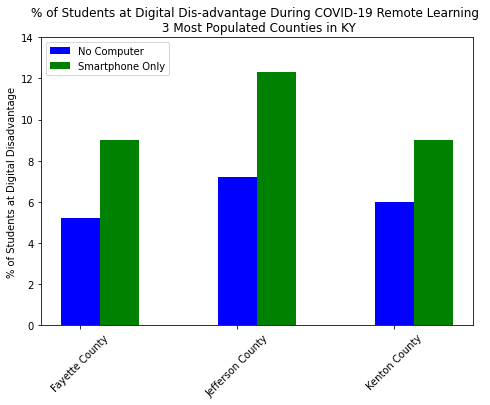

In [25]:
#define data to plot
county = cnty_access_percent_df3['NAME']

disadvantage_type = ['No Computer','Smartphone Only']

stud_no_comp = cnty_access_percent_df3['S2801_C02_011E']
stud_only_smartphone = cnty_access_percent_df3['S2801_C02_006E']

# define number of groupings/paired data using length of series for county names
x = np.arange(len(cnty_access_percent_df3['NAME']))

#define a figure to accept plots
#define ax as a way to add data in this instance bar for a data set
#The calling signature of add_axes is add_axes(rect), where rect is a list [x0, y0, width, height] 
#denoting the lower left point of the new axes in figure coodinates (x0,y0) 
#and its width and height. So the axes is positioned in absolute coordinates on the canvas.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#give data for each bar (1sr x based on index position in list, center bar 0, data set, color)
ax.bar(x+0.00, stud_no_comp, color='b', width= 0.25)
ax.bar(x+0.25, stud_only_smartphone, color='g', width= 0.25)

#add labels (axis, title, legend)
ax.set_ylabel('% of Students at Digital Disadvantage')
ax.set_title('% of Students at Digital Dis-advantage During COVID-19 Remote Learning \n 3 Most Populated Counties in KY')
ax.set_xticks(x)
ax.set_yticks(ax.get_yticks()[::1])

# add visual mods
ax.set_xticklabels(county, rotation=45) #rotate xtick labels so not on top of eachother
ax.legend(disadvantage_type, loc=2)

# view y limits
ax.get_ylim()

<a id='switchGears'></a>
#### Switching Gears

For the purpose of the 719-Storytelling Project was going to focus more on a single county initially. Now as opposed to only looking at data per county level, will dig into the census tract level for a single county. At a later date could run it parallel to data from census tract level collected during map698 (race_cb_tracts_hhi_2919_gdf_json.json) as an effort to identify more than percent of students in county left behind, but who that percent of students is.

Steps:

create county layer merged with data previous and add to mapbox style
- Save county TigerLine Shapefile to notebook data folder
- load in notebook and convert using geopandas to format that can be opened in mapbox (json, geojson, csv)
- write to mapbox readable format
- confirm works: add as dataset to mapbox in style will be using for storytelling map
- add more data to geopandas by merge in notebook, write and add to mapbox style
create census tract layer with data and add to mapbox style


<a id='loadData'></a>
#### Load Data

In [26]:
# load all US counties
tl_2019_counties_gdf = gpd.read_file("./data/project-files/tl_2019_us_county.shp")

Confirm load of counties shapefile as gdf

In [27]:
# confirm load 
type(tl_2019_counties_gdf)

geopandas.geodataframe.GeoDataFrame

In [28]:
# view data types and attributes
tl_2019_counties_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   3233 non-null   object  
 1   COUNTYFP  3233 non-null   object  
 2   COUNTYNS  3233 non-null   object  
 3   GEOID     3233 non-null   object  
 4   NAME      3233 non-null   object  
 5   NAMELSAD  3233 non-null   object  
 6   LSAD      3233 non-null   object  
 7   CLASSFP   3233 non-null   object  
 8   MTFCC     3233 non-null   object  
 9   CSAFP     1255 non-null   object  
 10  CBSAFP    1915 non-null   object  
 11  METDIVFP  110 non-null    object  
 12  FUNCSTAT  3233 non-null   object  
 13  ALAND     3233 non-null   int64   
 14  AWATER    3233 non-null   int64   
 15  INTPTLAT  3233 non-null   object  
 16  INTPTLON  3233 non-null   object  
 17  geometry  3233 non-null   geometry
dtypes: geometry(1), int64(2), object(15)
memory usage: 454.8+ KB


In [29]:
# glimpse headers
tl_2019_counties_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169270569,22849484,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


<a id='pullky'></a>
#### Pull KY Counties

In [30]:
# assign and pull out all rows associated with ky (21)
tl_19_ky_counties_gdf = tl_2019_counties_gdf[tl_2019_counties_gdf.STATEFP == '21']

Confirm pull of ky counties

In [31]:
# confirm ky county pull
tl_19_ky_counties_gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
9,21,053,00516873,21053,Clinton,Clinton County,06,H1,G4020,None,None,None,A,510875755,21152699,+36.7272577,-085.1360977,"POLYGON ((-85.23910 36.76983, -85.23443 36.786..."
58,21,003,00516848,21003,Allen,Allen County,06,H1,G4020,150,14540,None,A,891838779,19482100,+36.7507703,-086.1924580,"POLYGON ((-86.29580 36.85107, -86.29347 36.852..."
66,21,231,00516962,21231,Wayne,Wayne County,06,H1,G4020,None,None,None,A,1186690748,67283816,+36.8007715,-084.8265896,"POLYGON ((-85.04450 36.87093, -85.03908 36.874..."
133,21,209,00516951,21209,Scott,Scott County,06,H1,G4020,336,30460,None,A,729774435,9440820,+38.2857099,-084.5783405,"POLYGON ((-84.58054 38.47304, -84.58010 38.473..."
157,21,061,00516877,21061,Edmonson,Edmonson County,06,H1,G4020,150,14540,None,A,784468358,13258105,+37.2275136,-086.2180153,"POLYGON ((-86.39916 37.16990, -86.39932 37.170..."


In [32]:
# confirm number of counties 
tl_19_ky_counties_gdf.info() #120 counties for ky is correct

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 120 entries, 9 to 3224
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   120 non-null    object  
 1   COUNTYFP  120 non-null    object  
 2   COUNTYNS  120 non-null    object  
 3   GEOID     120 non-null    object  
 4   NAME      120 non-null    object  
 5   NAMELSAD  120 non-null    object  
 6   LSAD      120 non-null    object  
 7   CLASSFP   120 non-null    object  
 8   MTFCC     120 non-null    object  
 9   CSAFP     44 non-null     object  
 10  CBSAFP    63 non-null     object  
 11  METDIVFP  0 non-null      object  
 12  FUNCSTAT  120 non-null    object  
 13  ALAND     120 non-null    int64   
 14  AWATER    120 non-null    int64   
 15  INTPTLAT  120 non-null    object  
 16  INTPTLON  120 non-null    object  
 17  geometry  120 non-null    geometry
dtypes: geometry(1), int64(2), object(15)
memory usage: 17.8+ KB


<a id='removeDrop'></a>
#### Remove/Drop

Remove excess information not needed


In [33]:
# drop excess columns 

# To Drop Columns state fips code, county fips code, area water, legal statistical area description (census tract)
to_drop1 = ['STATEFP','COUNTYNS', 'LSAD','CLASSFP', 'MTFCC', 'CSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND','AWATER', 'CBSAFP']

# drop excess columns from geodataframe
# assign remaining data to new dataframe name
tl_19_ky_cnty_gdf = tl_19_ky_counties_gdf.drop(to_drop1, axis=1)

Confirm drop

In [34]:
# confirm drop
tl_19_ky_cnty_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 120 entries, 9 to 3224
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTYFP  120 non-null    object  
 1   GEOID     120 non-null    object  
 2   NAME      120 non-null    object  
 3   NAMELSAD  120 non-null    object  
 4   INTPTLAT  120 non-null    object  
 5   INTPTLON  120 non-null    object  
 6   geometry  120 non-null    geometry
dtypes: geometry(1), object(6)
memory usage: 7.5+ KB


In [35]:
# confirm header drop
tl_19_ky_cnty_gdf.head()

,COUNTYFP,GEOID,NAME,NAMELSAD,INTPTLAT,INTPTLON,geometry
9,053,21053,Clinton,Clinton County,+36.7272577,-085.1360977,"POLYGON ((-85.23910 36.76983, -85.23443 36.786..."
58,003,21003,Allen,Allen County,+36.7507703,-086.1924580,"POLYGON ((-86.29580 36.85107, -86.29347 36.852..."
66,231,21231,Wayne,Wayne County,+36.8007715,-084.8265896,"POLYGON ((-85.04450 36.87093, -85.03908 36.874..."
133,209,21209,Scott,Scott County,+38.2857099,-084.5783405,"POLYGON ((-84.58054 38.47304, -84.58010 38.473..."
157,061,21061,Edmonson,Edmonson County,+37.2275136,-086.2180153,"POLYGON ((-86.39916 37.16990, -86.39932 37.170..."


- Now need to create new column called GEO_ID in tl_19_ky_cnty_gdf and add '0500000US21' to the front of the countyfp code within this column. 
- Then merge both tl_19_ky_cnty_gdf and cnty_access_percent_df3 on the GEO_ID. 
- Drop attributes not of interest.

<a id='insertMerge'></a>
#### Insert/Merge

In [36]:
# insert letters to countyfp
GEO_ID = ('0500000US21' + tl_19_ky_cnty_gdf['COUNTYFP'])
tl_19_ky_cnty_gdf['GEO_ID'] = GEO_ID

In [37]:
# confirm insert
tl_19_ky_cnty_gdf.head()

,COUNTYFP,GEOID,NAME,NAMELSAD,INTPTLAT,INTPTLON,geometry,GEO_ID
9,053,21053,Clinton,Clinton County,+36.7272577,-085.1360977,"POLYGON ((-85.23910 36.76983, -85.23443 36.786...",0500000US21053
58,003,21003,Allen,Allen County,+36.7507703,-086.1924580,"POLYGON ((-86.29580 36.85107, -86.29347 36.852...",0500000US21003
66,231,21231,Wayne,Wayne County,+36.8007715,-084.8265896,"POLYGON ((-85.04450 36.87093, -85.03908 36.874...",0500000US21231
133,209,21209,Scott,Scott County,+38.2857099,-084.5783405,"POLYGON ((-84.58054 38.47304, -84.58010 38.473...",0500000US21209
157,061,21061,Edmonson,Edmonson County,+37.2275136,-086.2180153,"POLYGON ((-86.39916 37.16990, -86.39932 37.170...",0500000US21061


Merge with digital divide data

In [38]:
# merge on GEO_ID
tl_19_cnty_dig_access_gdf = tl_19_ky_cnty_gdf.merge(cnty_access_percent_df3, on = 'GEO_ID')

Confirm merge

In [39]:
# confirm merge
tl_19_cnty_dig_access_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   COUNTYFP        3 non-null      object  
 1   GEOID           3 non-null      object  
 2   NAME_x          3 non-null      object  
 3   NAMELSAD        3 non-null      object  
 4   INTPTLAT        3 non-null      object  
 5   INTPTLON        3 non-null      object  
 6   geometry        3 non-null      geometry
 7   GEO_ID          3 non-null      object  
 8   NAME_y          3 non-null      object  
 9   S2801_C01_001E  3 non-null      object  
 10  S2801_C02_001E  3 non-null      object  
 11  S2801_C02_002E  3 non-null      object  
 12  S2801_C02_003E  3 non-null      object  
 13  S2801_C02_004E  3 non-null      object  
 14  S2801_C02_005E  3 non-null      object  
 15  S2801_C02_006E  3 non-null      float64 
 16  S2801_C02_007E  3 non-null      object  
 17  S2801_C02_00

Glossary of header terms can be found in 'data/project-files/ACSST1Y2019.S2801.metadata_2022-02-20T141820.csv'. 
Intend to keep:

NAME  
GEO_ID  

S2801_C02_  
001E = Estimate # Households  

006E Smartphone with no other type of computing device  
011E No computer  

012E Estimate Total Households With an Internet subscription:  
013E Dial-up with no other type of Internet subscription  
015E Cellular data plan  
016E Cellular data plan with no other type of Internet subscription  
017E Broadband such as cable, fiber optic or DSL  
018E Satellite Internet service    
019E Without an Internet subscription  

Estimate Total households HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) Less than 20,000  
023E Without an Internet subscription  
Estimate Total households HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) 20,000 to 74,999  
027E Without an Internet subscription  
Estimate Total households HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS) 75,000 or more  
031E Without an Internet subscription  

<a id='dropExcessRename'></a>
#### Drop Excess Columns/Rename Headers
Drop headers that are excess.

In [40]:
# drop excess columns 

# To Drop Columns state fips code, county fips code, area water, legal statistical area description (census tract)
to_drop2 = ['S2801_C02_002E','S2801_C02_003E', 'S2801_C02_004E','S2801_C02_005E', 'S2801_C02_007E', 
            'S2801_C02_008E', 'S2801_C02_009E', 'S2801_C02_010E', 'S2801_C02_021E','S2801_C02_022E', 
            'S2801_C02_025E', 'S2801_C02_026E', 'S2801_C02_029E', 'S2801_C02_030E', 'S2801_C02_028E',
           'S2801_C02_024E', 'S2801_C02_020E', 'S2801_C02_014E', 'S2801_C02_001E']

# drop excess columns from geodataframe
# assign remaining data to new dataframe name
tl_19_ky_cnty_dig_min_gdf = tl_19_cnty_dig_access_gdf.drop(to_drop2, axis=1)

Confirm drop

In [41]:
tl_19_ky_cnty_dig_min_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   COUNTYFP        3 non-null      object  
 1   GEOID           3 non-null      object  
 2   NAME_x          3 non-null      object  
 3   NAMELSAD        3 non-null      object  
 4   INTPTLAT        3 non-null      object  
 5   INTPTLON        3 non-null      object  
 6   geometry        3 non-null      geometry
 7   GEO_ID          3 non-null      object  
 8   NAME_y          3 non-null      object  
 9   S2801_C01_001E  3 non-null      object  
 10  S2801_C02_006E  3 non-null      float64 
 11  S2801_C02_011E  3 non-null      float64 
 12  S2801_C02_012E  3 non-null      object  
 13  S2801_C02_013E  3 non-null      object  
 14  S2801_C02_015E  3 non-null      object  
 15  S2801_C02_016E  3 non-null      object  
 16  S2801_C02_017E  3 non-null      object  
 17  S2801_C02_01

Rename headers

In [42]:
# rename headers
tl_19_ky_cnty_dig_min_gdf.rename(columns = {'S2801_C02_006E':'smrtphOnly', 
                                                'S2801_C02_011E':'noComp', 'S2801_C02_012E':'estTtl_household_wInternet',
                                                'S2801_C02_013E':'dialUpOnly', 'S2801_C01_001E':'Ttol_households',
                                                'S2801_C02_015E':'cellData', 'S2801_C02_016E':'cellDataOnly',
                                                'S2801_C02_017E':'broadband', 'S2801_C02_018E':'satellite',
                                                'S2801_C02_019E':'noInternet',
                                                'S2801_C02_023E':'noInternet<20K',
                                                'S2801_C02_027E':'noInternet24-74.9k',
                                                'S2801_C02_031E':'noInternet75k+' 
                              }, inplace=True)

In [43]:
# confirm rename
tl_19_ky_cnty_dig_min_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   COUNTYFP                    3 non-null      object  
 1   GEOID                       3 non-null      object  
 2   NAME_x                      3 non-null      object  
 3   NAMELSAD                    3 non-null      object  
 4   INTPTLAT                    3 non-null      object  
 5   INTPTLON                    3 non-null      object  
 6   geometry                    3 non-null      geometry
 7   GEO_ID                      3 non-null      object  
 8   NAME_y                      3 non-null      object  
 9   Ttol_households             3 non-null      object  
 10  smrtphOnly                  3 non-null      float64 
 11  noComp                      3 non-null      float64 
 12  estTtl_household_wInternet  3 non-null      object  
 13  dialUpOnly      

In [44]:
tl_19_ky_cnty_dig_min_gdf.head()

,COUNTYFP,GEOID,NAME_x,NAMELSAD,INTPTLAT,INTPTLON,geometry,GEO_ID,NAME_y,Ttol_households,smrtphOnly,noComp,estTtl_household_wInternet,dialUpOnly,cellData,cellDataOnly,broadband,satellite,noInternet,noInternet<20K,noInternet24-74.9k,noInternet75k+
0,117,21117,Kenton,Kenton County,+38.9305031,-084.5334381,"POLYGON ((-84.61411 38.99757, -84.61423 38.998...",0500000US21117,Kenton County,65362,9.0,6.0,88.3,0.4,78.6,10.8,75.1,3.5,11.7,36.1,12.6,4.1
1,067,21067,Fayette,Fayette County,+38.0406751,-084.4582743,"POLYGON ((-84.62497 38.11671, -84.62212 38.125...",0500000US21067,Fayette County,131929,9.0,5.2,89.1,0.1,79.4,10.4,77.4,3.3,10.9,33.7,11.0,2.4
2,111,21111,Jefferson,Jefferson County,+38.1895321,-085.6576243,"POLYGON ((-85.84264 38.23360, -85.84250 38.233...",0500000US21111,Jefferson County,316174,12.3,7.2,87.6,0.2,81.4,16.5,68.7,5.1,12.4,28.9,13.4,4.7


Sight checked that headers match corresponding data. (QA/QC performed). Data all have correctly labeled headers.

<a id='convertFloat'></a>
#### Convert Object to Float

In [45]:
# convert objects to float
tl_19_ky_cnty_dig_min_gdf['Ttol_households']=tl_19_ky_cnty_dig_min_gdf['Ttol_households'].astype(float)
tl_19_ky_cnty_dig_min_gdf['estTtl_household_wInternet']=tl_19_ky_cnty_dig_min_gdf['estTtl_household_wInternet'].astype(float)
tl_19_ky_cnty_dig_min_gdf['dialUpOnly']=tl_19_ky_cnty_dig_min_gdf['dialUpOnly'].astype(float)
tl_19_ky_cnty_dig_min_gdf['cellData']=tl_19_ky_cnty_dig_min_gdf['cellData'].astype(float)
tl_19_ky_cnty_dig_min_gdf['cellDataOnly']=tl_19_ky_cnty_dig_min_gdf['cellDataOnly'].astype(float)
tl_19_ky_cnty_dig_min_gdf['broadband']=tl_19_ky_cnty_dig_min_gdf['broadband'].astype(float)
tl_19_ky_cnty_dig_min_gdf['satellite']=tl_19_ky_cnty_dig_min_gdf['satellite'].astype(float)
tl_19_ky_cnty_dig_min_gdf['noInternet']=tl_19_ky_cnty_dig_min_gdf['noInternet'].astype(float)
tl_19_ky_cnty_dig_min_gdf['noInternet<20K']=tl_19_ky_cnty_dig_min_gdf['noInternet<20K'].astype(float)
tl_19_ky_cnty_dig_min_gdf['noInternet24-74.9k']=tl_19_ky_cnty_dig_min_gdf['noInternet24-74.9k'].astype(float)
tl_19_ky_cnty_dig_min_gdf['noInternet75k+']=tl_19_ky_cnty_dig_min_gdf['noInternet75k+'].astype(float)


Confirm objects converted to float

In [46]:
# confirm data type
tl_19_ky_cnty_dig_min_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   COUNTYFP                    3 non-null      object  
 1   GEOID                       3 non-null      object  
 2   NAME_x                      3 non-null      object  
 3   NAMELSAD                    3 non-null      object  
 4   INTPTLAT                    3 non-null      object  
 5   INTPTLON                    3 non-null      object  
 6   geometry                    3 non-null      geometry
 7   GEO_ID                      3 non-null      object  
 8   NAME_y                      3 non-null      object  
 9   Ttol_households             3 non-null      float64 
 10  smrtphOnly                  3 non-null      float64 
 11  noComp                      3 non-null      float64 
 12  estTtl_household_wInternet  3 non-null      float64 
 13  dialUpOnly      

<a id='plotCounties'></a>
#### Plot Counties

Map the counties available with data in grey

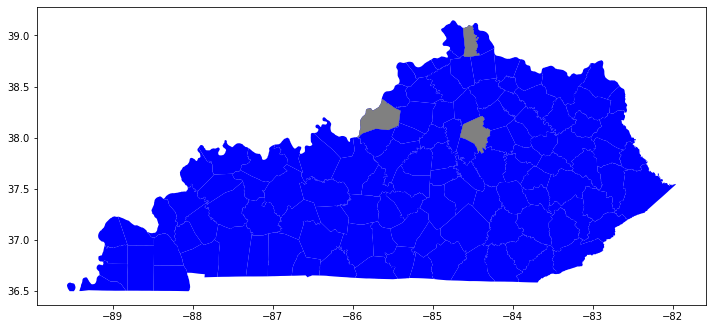

In [47]:
# plot 
fig, ax = plt.subplots(figsize=(12, 8))
tl_19_ky_cnty_gdf.plot(ax=ax, color='blue', zorder=0);
tl_19_ky_cnty_dig_min_gdf.plot(ax=ax, color='grey', zorder=1,);

<a id='writeCounties'></a>
#### Write Counties to Layer

Write all county level layer and counties with data layer to file json. Then add these data sets as jsons into mapbox data and style within the style to be used in the storytelling map.

In [221]:
# write gdfs to geoJSON
tl_19_ky_cnty_gdf.to_file('./data/tlKyCnty19_json.json', driver='GeoJSON')
tl_19_ky_cnty_dig_min_gdf.to_file('./data/tlKyCnty19Digital_json.json', driver='GeoJSON')

C:\Users\jbra2\.conda\envs\719_dig_divide\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\jbra2\.conda\envs\719_dig_divide\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Remember will need to delete the line containing CRS information before importing as a dataset into mapbox. Example of what this line looks like:  
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::4269" } },

Map675-mod04 goes over some tips and tricks for mapbox styling and using as basemap within index.html.
Side note: if going to style any data by number value (range color ramp etc) data must be in numerical format

<a id='images'></a>
### Images in Story

Images pulled from Unsplash ([License](https://unsplash.com/license))
License in a nutshell:
- all photos can be downloaded and used for free 
- commercial and non-commercial purposes
- no permission needed, attribution appreciated

<a id='fayettecbtracts'></a>
### Fayette County Census Bureau Tracts

<a id ='loadFayette'></a>
#### Load data

In [48]:
# load all us census bureau tracts for fayette county
cb19_tracts_gdf = gpd.read_file('./data/project-files/cb_2019_tract_500k/cb_2019_21_tract_500k.shp')

Confirm load of tracts shapefile as gdf

In [49]:
# confirm load
type(cb19_tracts_gdf) #geodataframe

geopandas.geodataframe.GeoDataFrame

In [50]:
# view data types and attributes
cb19_tracts_gdf.info() # 1115 entires at 10 columns per entry

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   1115 non-null   object  
 1   COUNTYFP  1115 non-null   object  
 2   TRACTCE   1115 non-null   object  
 3   AFFGEOID  1115 non-null   object  
 4   GEOID     1115 non-null   object  
 5   NAME      1115 non-null   object  
 6   LSAD      1115 non-null   object  
 7   ALAND     1115 non-null   int64   
 8   AWATER    1115 non-null   int64   
 9   geometry  1115 non-null   geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 87.2+ KB


In [51]:
# glimpse headers
cb19_tracts_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,089,040502,1400000US21089040502,21089040502,405.02,CT,248542928,4123331,"POLYGON ((-83.05044 38.46728, -83.04835 38.467..."
1,21,087,930100,1400000US21087930100,21087930100,9301,CT,253771498,2116317,"POLYGON ((-85.69732 37.30184, -85.68857 37.352..."
2,21,111,012601,1400000US21111012601,21111012601,126.01,CT,4460299,5315,"POLYGON ((-85.84257 38.19537, -85.83500 38.201..."
3,21,111,012302,1400000US21111012302,21111012302,123.02,CT,4811351,28216,"POLYGON ((-85.82930 38.15719, -85.82586 38.162..."
4,21,099,970300,1400000US21099970300,21099970300,9703,CT,256953396,5843968,"POLYGON ((-86.16112 37.35080, -86.15845 37.351..."


Load census bureau tract level data

In [52]:
# load data 
fayette_tract_access_df = pd.read_csv('./data/project-files/ACS_5yr_survey_fayette_tract_level/ACSST5Y2019.S2801_data_with_overlays_2022-03-08T161019.csv')

In [53]:
# verify df now references pandas df object not csv file
type(fayette_tract_access_df) #dataframe

pandas.core.frame.DataFrame

In [54]:
# intial glimpse
fayette_tract_access_df.head()

,GEO_ID,NAME,S2801_C01_001E,S2801_C01_001M,S2801_C01_002E,S2801_C01_002M,S2801_C01_003E,S2801_C01_003M,S2801_C01_004E,S2801_C01_004M,S2801_C01_005E,S2801_C01_005M,S2801_C01_006E,S2801_C01_006M,S2801_C01_007E,S2801_C01_007M,S2801_C01_008E,S2801_C01_008M,S2801_C01_009E,S2801_C01_009M,S2801_C01_010E,S2801_C01_010M,S2801_C01_011E,S2801_C01_011M,S2801_C01_012E,S2801_C01_012M,S2801_C01_013E,S2801_C01_013M,S2801_C01_014E,S2801_C01_014M,S2801_C01_015E,S2801_C01_015M,S2801_C01_016E,S2801_C01_016M,S2801_C01_017E,S2801_C01_017M,S2801_C01_018E,S2801_C01_018M,S2801_C01_019E,S2801_C01_019M,S2801_C01_020E,S2801_C01_020M,S2801_C01_021E,S2801_C01_021M,S2801_C01_022E,S2801_C01_022M,S2801_C01_023E,S2801_C01_023M,S2801_C01_024E,S2801_C01_024M,S2801_C01_025E,S2801_C01_025M,S2801_C01_026E,S2801_C01_026M,S2801_C01_027E,S2801_C01_027M,S2801_C01_028E,S2801_C01_028M,S2801_C01_029E,S2801_C01_029M,S2801_C01_030E,S2801_C01_030M,S2801_C01_031E,S2801_C01_031M,S2801_C02_001E,S2801_C02_001M,S2801_C02_002E,S2801_C02_002M,S2801_C02_003E,S2801_C02_003M,S2801_C02_004E,S2801_C02_004M,S2801_C02_005E,S2801_C02_005M,S2801_C02_006E,S2801_C02_006M,S2801_C02_007E,S2801_C02_007M,S2801_C02_008E,S2801_C02_008M,S2801_C02_009E,S2801_C02_009M,S2801_C02_010E,S2801_C02_010M,S2801_C02_011E,S2801_C02_011M,S2801_C02_012E,S2801_C02_012M,S2801_C02_013E,S2801_C02_013M,S2801_C02_014E,S2801_C02_014M,S2801_C02_015E,S2801_C02_015M,S2801_C02_016E,S2801_C02_016M,S2801_C02_017E,S2801_C02_017M,S2801_C02_018E,S2801_C02_018M,S2801_C02_019E,S2801_C02_019M,S2801_C02_020E,S2801_C02_020M,S2801_C02_021E,S2801_C02_021M,S2801_C02_022E,S2801_C02_022M,S2801_C02_023E,S2801_C02_023M,S2801_C02_024E,S2801_C02_024M,S2801_C02_025E,S2801_C02_025M,S2801_C02_026E,S2801_C02_026M,S2801_C02_027E,S2801_C02_027M,S2801_C02_028E,S2801_C02_028M,S2801_C02_029E,S2801_C02_029M,S2801_C02_030E,S2801_C02_030M,S2801_C02_031E,S2801_C02_031M
0,id,Geographic Area Name,Estimate!!Total!!Total households,Margin of Error!!Total!!Total households,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPES OF CO...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPE OF INT...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPE OF INT...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPE OF INT...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPE OF INT...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPE OF INT...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPE OF INT...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPE OF INT...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!TYPE OF INT...,Margin of Error!!Total!!Total households!!TYPE...,Estimate!!Total!!Total households!!HOUSEHOLD I...,Margin of Error!!Total!!Total households!!HOUS...,Estimate!!Total!!Total households!!HOUSEHOLD I...,Margin of Error!!Total!!Total households!!HOUS...,Estimate!!Total!!Total hou

In [55]:
# intial glimpse
fayette_tract_access_df.info() # 83 entries with 126 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Columns: 126 entries, GEO_ID to S2801_C02_031M
dtypes: object(126)
memory usage: 81.8+ KB


Note that only 83 entries exist for this census tract level information. 
Initial cesnsus bureau entries had 1115 entries. This must have included all census tracts across ky as on the website where teh data was pulled only had 83 census tracts available to select for Fayette County when adjusting geography to pull from.
Drop all the same columns previously dropped per county previously

<a id='dropColumns'></a>
#### Drop excess columns Remove excess Row

In [56]:
# to drop columns
to_drop = ['S2801_C01_001M', 'S2801_C01_002M', 'S2801_C01_003M', 'S2801_C01_004M', 'S2801_C01_005M', 'S2801_C01_006M', 'S2801_C01_007M', 'S2801_C01_008M',
          'S2801_C01_009M', 'S2801_C01_010M', 'S2801_C01_011M', 'S2801_C01_012M', 'S2801_C01_013M', 'S2801_C01_014M', 'S2801_C01_015M', 'S2801_C01_016M', 'S2801_C01_017M',
          'S2801_C01_018M', 'S2801_C01_019M', 'S2801_C01_020M', 'S2801_C01_021M', 'S2801_C01_022M', 'S2801_C01_023M', 'S2801_C01_024M', 'S2801_C01_025M', 'S2801_C01_026M',
          'S2801_C01_027M', 'S2801_C01_028M', 'S2801_C01_029M', 'S2801_C01_030M', 'S2801_C01_031M', 'S2801_C02_001M', 'S2801_C02_002M', 'S2801_C02_003M', 'S2801_C02_004M', 'S2801_C02_005M', 'S2801_C02_006M', 'S2801_C02_007M', 'S2801_C02_008M',
          'S2801_C02_009M', 'S2801_C02_010M', 'S2801_C02_011M', 'S2801_C02_012M', 'S2801_C02_013M', 'S2801_C02_014M', 'S2801_C02_015M', 'S2801_C02_016M', 'S2801_C02_017M',
          'S2801_C02_018M', 'S2801_C02_019M', 'S2801_C02_020M', 'S2801_C02_021M', 'S2801_C02_022M', 'S2801_C02_023M', 'S2801_C02_024M', 'S2801_C02_025M', 'S2801_C02_026M',
          'S2801_C02_027M', 'S2801_C02_028M', 'S2801_C02_029M', 'S2801_C02_030M', 'S2801_C02_031M']
# drop excess columns from dataframe
# assign remaining data to new dataframe name
fayette_tract_access_df_drop = fayette_tract_access_df.drop(to_drop, axis=1)

Confirm drop

In [57]:
# confirm drop
fayette_tract_access_df_drop.info() #64 columns remain of original 126

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO_ID          83 non-null     object
 1   NAME            83 non-null     object
 2   S2801_C01_001E  83 non-null     object
 3   S2801_C01_002E  83 non-null     object
 4   S2801_C01_003E  83 non-null     object
 5   S2801_C01_004E  83 non-null     object
 6   S2801_C01_005E  83 non-null     object
 7   S2801_C01_006E  83 non-null     object
 8   S2801_C01_007E  83 non-null     object
 9   S2801_C01_008E  83 non-null     object
 10  S2801_C01_009E  83 non-null     object
 11  S2801_C01_010E  83 non-null     object
 12  S2801_C01_011E  83 non-null     object
 13  S2801_C01_012E  83 non-null     object
 14  S2801_C01_013E  83 non-null     object
 15  S2801_C01_014E  83 non-null     object
 16  S2801_C01_015E  83 non-null     object
 17  S2801_C01_016E  83 non-null     object
 18  S2801_C01_01

In [58]:
# create dataframe with percentange values of interest
fay_tract_access_percent_df= fayette_tract_access_df_drop.filter(['GEO_ID', 'NAME', 'S2801_C01_001E','S2801_C02_001E', 'S2801_C02_002E', 'S2801_C02_003E', 'S2801_C02_004E', 'S2801_C02_005E',
                                        'S2801_C02_006E', 'S2801_C02_007E', 'S2801_C02_008E', 'S2801_C02_009E', 'S2801_C02_010E',
                                        'S2801_C02_011E', 'S2801_C02_012E', 'S2801_C02_013E', 'S2801_C02_014E', 'S2801_C02_015E',
                                        'S2801_C02_016E', 'S2801_C02_017E', 'S2801_C02_018E', 'S2801_C02_019E', 'S2801_C02_020E',
                                         'S2801_C02_021E', 'S2801_C02_022E', 'S2801_C02_023E', 'S2801_C02_024E', 'S2801_C02_025E',
                                         'S2801_C02_026E', 'S2801_C02_027E', 'S2801_C02_028E', 'S2801_C02_029E', 'S2801_C02_030E', 'S2801_C02_031E'
                                    ], axis=1)

In [59]:
fay_tract_access_percent_df.head() # 34 columns remain

,GEO_ID,NAME,S2801_C01_001E,S2801_C02_001E,S2801_C02_002E,S2801_C02_003E,S2801_C02_004E,S2801_C02_005E,S2801_C02_006E,S2801_C02_007E,S2801_C02_008E,S2801_C02_009E,S2801_C02_010E,S2801_C02_011E,S2801_C02_012E,S2801_C02_013E,S2801_C02_014E,S2801_C02_015E,S2801_C02_016E,S2801_C02_017E,S2801_C02_018E,S2801_C02_019E,S2801_C02_020E,S2801_C02_021E,S2801_C02_022E,S2801_C02_023E,S2801_C02_024E,S2801_C02_025E,S2801_C02_026E,S2801_C02_027E,S2801_C02_028E,S2801_C02_029E,S2801_C02_030E,S2801_C02_031E
0,id,Geographic Area Name,Estimate!!Total!!Total households,Estimate!!Percent!!Total households,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPES OF ...,Estimate!!Percent!!Total households!!TYPE OF I...,Estimate!!Percent!!Total households!!TYPE OF I...,Estimate!!Percent!!Total households!!TYPE OF I...,Estimate!!Percent!!Total households!!TYPE OF I...,Estimate!!Percent!!Total households!!TYPE OF I...,Estimate!!Percent!!Total households!!TYPE OF I...,Estimate!!Percent!!Total households!!TYPE OF I...,Estimate!!Percent!!Total households!!TYPE OF I...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...,Estimate!!Percent!!Total households!!HOUSEHOLD...
1,1400000US21067000101,"Census Tract 1.01, Fayette County, Kentucky",1993,(X),85.0,66.3,3.8,79.3,13.1,44.7,0.5,10.8,0.0,15.0,72.5,0.0,72.5,63.2,15.7,56.4,0.8,27.5,(X),0.0,59.5,40.5,(X),0.0,77.1,22.9,(X),0.0,92.7,7.3
2,1400000US21067000102,"Census Tract 1.02, Fayette County, Kentucky",984,(X),70.3,59.3,5.5,62.3,8.7,34.1,0.8,4.5,0.0,29.7,57.3,0.0,57.3,51.9,6.7,50.6,0.0,42.7,(X),0.0,33.3,66.7,(X),0.0,64.0,36.0,(X),0.0,93.1,6.9
3,1400000US21067000200,"Census Tract 2, Fayette County, Kentucky",1225,(X),88.7,59.6,0.6,87.3,21.9,43.3,0.8,5.6,0.0,11.3,82.8,0.0,82.8,75.0,19.3,63.4,0.8,17.2,(X),0.0,71.2,28.8,(X),0.0,87.1,12.9,(X),0.0,100.0,0.0
4,1400000US21067000300,"Census Tract 3, Fayette County, Kentucky",1249,(X),86.5,55.2,9.7,73.5,20.3,45.2,2.2,2.5,0.0,13.5,73.9,0.0,73.9,62.9,12.6,60.0,3.4,26.1,(X),0.0,69.8,30.2,(X),0.0,70.8,29.2,(X),0.0,100.0,0.0


In [60]:
# remove excess row of title heads 
fay_tract_access_percent_df.drop(index=fay_tract_access_percent_df.index[0],
                axis=0,
                inplace=True)

In [61]:
# view all columns
pd.set_option('display.max_columns', None)
fay_tract_access_percent_df.head()

,GEO_ID,NAME,S2801_C01_001E,S2801_C02_001E,S2801_C02_002E,S2801_C02_003E,S2801_C02_004E,S2801_C02_005E,S2801_C02_006E,S2801_C02_007E,S2801_C02_008E,S2801_C02_009E,S2801_C02_010E,S2801_C02_011E,S2801_C02_012E,S2801_C02_013E,S2801_C02_014E,S2801_C02_015E,S2801_C02_016E,S2801_C02_017E,S2801_C02_018E,S2801_C02_019E,S2801_C02_020E,S2801_C02_021E,S2801_C02_022E,S2801_C02_023E,S2801_C02_024E,S2801_C02_025E,S2801_C02_026E,S2801_C02_027E,S2801_C02_028E,S2801_C02_029E,S2801_C02_030E,S2801_C02_031E
1,1400000US21067000101,"Census Tract 1.01, Fayette County, Kentucky",1993,(X),85.0,66.3,3.8,79.3,13.1,44.7,0.5,10.8,0.0,15.0,72.5,0.0,72.5,63.2,15.7,56.4,0.8,27.5,(X),0.0,59.5,40.5,(X),0.0,77.1,22.9,(X),0.0,92.7,7.3
2,1400000US21067000102,"Census Tract 1.02, Fayette County, Kentucky",984,(X),70.3,59.3,5.5,62.3,8.7,34.1,0.8,4.5,0.0,29.7,57.3,0.0,57.3,51.9,6.7,50.6,0.0,42.7,(X),0.0,33.3,66.7,(X),0.0,64.0,36.0,(X),0.0,93.1,6.9
3,1400000US21067000200,"Census Tract 2, Fayette County, Kentucky",1225,(X),88.7,59.6,0.6,87.3,21.9,43.3,0.8,5.6,0.0,11.3,82.8,0.0,82.8,75.0,19.3,63.4,0.8,17.2,(X),0.0,71.2,28.8,(X),0.0,87.1,12.9,(X),0.0,100.0,0.0
4,1400000US21067000300,"Census Tract 3, Fayette County, Kentucky",1249,(X),86.5,55.2,9.7,73.5,20.3,45.2,2.2,2.5,0.0,13.5,73.9,0.0,73.9,62.9,12.6,60.0,3.4,26.1,(X),0.0,69.8,30.2,(X),0.0,70.8,29.2,(X),0.0,100.0,0.0
5,1400000US21067000400,"Census Tract 4, Fayette County, Kentucky",784,(X),82.3,45.8,7.0,69.9,19.4,48.6,1.3,5.7,0.0,17.7,74.5,0.0,74.5,62.8,24.1,43.9,5.7,25.5,(X),0.0,74.8,25.2,(X),0.0,72.8,27.2,(X),0.0,81.5,18.5


In [62]:
# view data type
fay_tract_access_percent_df.info() #all data type: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 1 to 82
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO_ID          82 non-null     object
 1   NAME            82 non-null     object
 2   S2801_C01_001E  82 non-null     object
 3   S2801_C02_001E  82 non-null     object
 4   S2801_C02_002E  82 non-null     object
 5   S2801_C02_003E  82 non-null     object
 6   S2801_C02_004E  82 non-null     object
 7   S2801_C02_005E  82 non-null     object
 8   S2801_C02_006E  82 non-null     object
 9   S2801_C02_007E  82 non-null     object
 10  S2801_C02_008E  82 non-null     object
 11  S2801_C02_009E  82 non-null     object
 12  S2801_C02_010E  82 non-null     object
 13  S2801_C02_011E  82 non-null     object
 14  S2801_C02_012E  82 non-null     object
 15  S2801_C02_013E  82 non-null     object
 16  S2801_C02_014E  82 non-null     object
 17  S2801_C02_015E  82 non-null     object
 18  S2801_C02_01

<a id='convertObjects'></a>
#### Convert to Float (Drop any additional columns)

In [63]:
# convert objects to float 
fay_tract_access_percent_df['S2801_C02_011E']=fay_tract_access_percent_df['S2801_C02_011E'].astype(float)
fay_tract_access_percent_df['S2801_C02_006E']=fay_tract_access_percent_df['S2801_C02_006E'].astype(float)

fay_tract_access_percent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 1 to 82
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GEO_ID          82 non-null     object 
 1   NAME            82 non-null     object 
 2   S2801_C01_001E  82 non-null     object 
 3   S2801_C02_001E  82 non-null     object 
 4   S2801_C02_002E  82 non-null     object 
 5   S2801_C02_003E  82 non-null     object 
 6   S2801_C02_004E  82 non-null     object 
 7   S2801_C02_005E  82 non-null     object 
 8   S2801_C02_006E  82 non-null     float64
 9   S2801_C02_007E  82 non-null     object 
 10  S2801_C02_008E  82 non-null     object 
 11  S2801_C02_009E  82 non-null     object 
 12  S2801_C02_010E  82 non-null     object 
 13  S2801_C02_011E  82 non-null     float64
 14  S2801_C02_012E  82 non-null     object 
 15  S2801_C02_013E  82 non-null     object 
 16  S2801_C02_014E  82 non-null     object 
 17  S2801_C02_015E  82 non-null     objec

Drop headers that are excess

In [64]:
# drop excess columns
# To Drop Columns 
to_drop2 = ['S2801_C02_002E','S2801_C02_003E', 'S2801_C02_004E','S2801_C02_005E', 'S2801_C02_007E', 
            'S2801_C02_008E', 'S2801_C02_009E', 'S2801_C02_010E', 'S2801_C02_021E','S2801_C02_022E', 
            'S2801_C02_025E', 'S2801_C02_026E', 'S2801_C02_029E', 'S2801_C02_030E', 'S2801_C02_028E',
           'S2801_C02_024E', 'S2801_C02_020E', 'S2801_C02_014E', 'S2801_C02_001E']

# drop excess columns from dataframe
# assign remaining data to new dataframe name
fay_tract_access_percent_df_min = fay_tract_access_percent_df.drop(to_drop2, axis=1)

In [65]:
# confirm drop
fay_tract_access_percent_df_min.info() #down to 15 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 1 to 82
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GEO_ID          82 non-null     object 
 1   NAME            82 non-null     object 
 2   S2801_C01_001E  82 non-null     object 
 3   S2801_C02_006E  82 non-null     float64
 4   S2801_C02_011E  82 non-null     float64
 5   S2801_C02_012E  82 non-null     object 
 6   S2801_C02_013E  82 non-null     object 
 7   S2801_C02_015E  82 non-null     object 
 8   S2801_C02_016E  82 non-null     object 
 9   S2801_C02_017E  82 non-null     object 
 10  S2801_C02_018E  82 non-null     object 
 11  S2801_C02_019E  82 non-null     object 
 12  S2801_C02_023E  82 non-null     object 
 13  S2801_C02_027E  82 non-null     object 
 14  S2801_C02_031E  82 non-null     object 
dtypes: float64(2), object(13)
memory usage: 9.7+ KB


<a id='renameThoseHeaders'></a>
#### Rename Headers

In [66]:
# rename headers 
fay_tract_access_percent_df_min.rename(columns = {'S2801_C02_006E':'smrtphOnly', 
                                                'S2801_C02_011E':'noComp', 'S2801_C02_012E':'estTtl_household_wInternet',
                                                'S2801_C02_013E':'dialUpOnly', 'S2801_C01_001E':'Ttol_households',
                                                'S2801_C02_015E':'cellData', 'S2801_C02_016E':'cellDataOnly',
                                                'S2801_C02_017E':'broadband', 'S2801_C02_018E':'satellite',
                                                'S2801_C02_019E':'noInternet',
                                                'S2801_C02_023E':'noInternet<20K',
                                                'S2801_C02_027E':'noInternet24-74.9k',
                                                'S2801_C02_031E':'noInternet75k+' 
                              }, inplace=True)

In [67]:
# confirm rename
fay_tract_access_percent_df_min.head()

,GEO_ID,NAME,Ttol_households,smrtphOnly,noComp,estTtl_household_wInternet,dialUpOnly,cellData,cellDataOnly,broadband,satellite,noInternet,noInternet<20K,noInternet24-74.9k,noInternet75k+
1,1400000US21067000101,"Census Tract 1.01, Fayette County, Kentucky",1993,13.1,15.0,72.5,0.0,63.2,15.7,56.4,0.8,27.5,40.5,22.9,7.3
2,1400000US21067000102,"Census Tract 1.02, Fayette County, Kentucky",984,8.7,29.7,57.3,0.0,51.9,6.7,50.6,0.0,42.7,66.7,36.0,6.9
3,1400000US21067000200,"Census Tract 2, Fayette County, Kentucky",1225,21.9,11.3,82.8,0.0,75.0,19.3,63.4,0.8,17.2,28.8,12.9,0.0
4,1400000US21067000300,"Census Tract 3, Fayette County, Kentucky",1249,20.3,13.5,73.9,0.0,62.9,12.6,60.0,3.4,26.1,30.2,29.2,0.0
5,1400000US21067000400,"Census Tract 4, Fayette County, Kentucky",784,19.4,17.7,74.5,0.0,62.8,24.1,43.9,5.7,25.5,25.2,27.2,18.5


Merge access df GEO_ID with gdf of census bureau tracts as AFFGEOID

In [68]:
# rename cb tracts header AFFGEOID to GEO_ID
cb19_tracts_gdf.rename(columns = {'AFFGEOID':'GEO_ID'}, inplace=True)

In [69]:
# confirm header rename
cb19_tracts_gdf.info() #confirmed

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   1115 non-null   object  
 1   COUNTYFP  1115 non-null   object  
 2   TRACTCE   1115 non-null   object  
 3   GEO_ID    1115 non-null   object  
 4   GEOID     1115 non-null   object  
 5   NAME      1115 non-null   object  
 6   LSAD      1115 non-null   object  
 7   ALAND     1115 non-null   int64   
 8   AWATER    1115 non-null   int64   
 9   geometry  1115 non-null   geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 87.2+ KB


<a id='mergeWithDig'></a>
### Merge CB Tracts with Digital Access Data

Merge with digital access data

In [77]:
# merge on GEO_ID
fay_19_tract_dig_access_gdf = cb19_tracts_gdf.merge(fay_tract_access_percent_df_min, on = 'GEO_ID')

Confirm merge

In [78]:
# confirm merge
fay_19_tract_dig_access_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   STATEFP                     82 non-null     object  
 1   COUNTYFP                    82 non-null     object  
 2   TRACTCE                     82 non-null     object  
 3   GEO_ID                      82 non-null     object  
 4   GEOID                       82 non-null     object  
 5   NAME_x                      82 non-null     object  
 6   LSAD                        82 non-null     object  
 7   ALAND                       82 non-null     int64   
 8   AWATER                      82 non-null     int64   
 9   geometry                    82 non-null     geometry
 10  NAME_y                      82 non-null     object  
 11  Ttol_households             82 non-null     object  
 12  smrtphOnly                  82 non-null     float64 
 13  noComp        

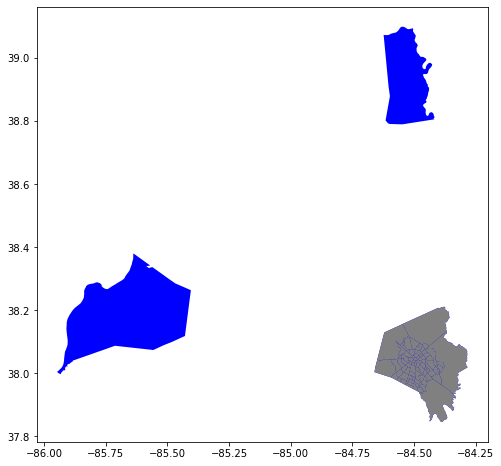

In [79]:
# plot
fig, ax = plt.subplots(figsize=(12, 8))
fay_19_tract_dig_access_gdf.plot(ax=ax, color='grey', zorder=1);
tl_19_ky_cnty_dig_min_gdf.plot(ax=ax, color='blue', zorder=0,);

In [81]:
# view data
fay_19_tract_dig_access_gdf.head()


,STATEFP,COUNTYFP,TRACTCE,GEO_ID,GEOID,NAME_x,LSAD,ALAND,AWATER,geometry,NAME_y,Ttol_households,smrtphOnly,noComp,estTtl_household_wInternet,dialUpOnly,cellData,cellDataOnly,broadband,satellite,noInternet,noInternet<20K,noInternet24-74.9k,noInternet75k+
0,21,067,001500,1400000US21067001500,21067001500,15,CT,1968316,0,"POLYGON ((-84.47247 38.05277, -84.47135 38.053...","Census Tract 15, Fayette County, Kentucky",866,13.0,12.6,76.8,0.0,63.3,12.0,63.4,1.7,23.2,46.7,20.0,13.7
1,21,067,003202,1400000US21067003202,21067003202,32.02,CT,3028160,0,"POLYGON ((-84.46479 38.06010, -84.45494 38.063...","Census Tract 32.02, Fayette County, Kentucky",2572,10.8,10.3,80.2,0.0,65.7,6.5,72.0,4.9,19.8,23.1,24.4,8.8
2,21,067,003914,1400000US21067003914,21067003914,39.14,CT,1340775,0,"POLYGON ((-84.41176 38.02212, -84.40621 38.025...","Census Tract 39.14, Fayette County, Kentucky",870,2.1,4.0,92.9,0.0,77.9,5.1,85.9,4.8,7.1,55.4,0.0,0.0
3,21,067,001900,1400000US21067001900,21067001900,19,CT,2300743,0,"POLYGON ((-84.54345 38.04757, -84.54265 38.047...","Census Tract 19, Fayette County, Kentucky",1770,10.6,7.7,80.3,0.0,71.0,11.9,65.3,4.5,19.7,31.2,15.1,0.0
4,21,067,003201,1400000US21067003201,21067003201,32.01,CT,1982605,0,"POLYGON ((-84.47185 38.06696, -84.46873 38.067...","Census Tract 32.01, Fayette County, Kentucky",695,8.6,13.8,82.0,0.0,62.4,9.9,72.1,0.7,18.0,23.6,18.9,11.9


In [82]:
print(fay_19_tract_dig_access_gdf)

   STATEFP COUNTYFP TRACTCE                GEO_ID        GEOID NAME_x LSAD  \
0       21      067  001500  1400000US21067001500  21067001500     15   CT   
1       21      067  003202  1400000US21067003202  21067003202  32.02   CT   
2       21      067  003914  1400000US21067003914  21067003914  39.14   CT   
3       21      067  001900  1400000US21067001900  21067001900     19   CT   
4       21      067  003201  1400000US21067003201  21067003201  32.01   CT   
5       21      067  002900  1400000US21067002900  21067002900     29   CT   
6       21      067  004001  1400000US21067004001  21067004001  40.01   CT   
7       21      067  002002  1400000US21067002002  21067002002  20.02   CT   
8       21      067  003101  1400000US21067003101  21067003101  31.01   CT   
9       21      067  001100  1400000US21067001100  21067001100     11   CT   
10      21      067  004209  1400000US21067004209  21067004209  42.09   CT   
11      21      067  003300  1400000US21067003300  21067003300  

It was seen that not all census tracts reported access to devices or internet. It was also seen that some census tracts were incomplete for all of their data (these tracts will be removed from the data set). These tracts (nonreported/nonestimated/not complete in data) will be represented by a secondary color scheme that doesn't fall on the range/color ramp of all those that did report or estimate values.

In [74]:
#remove row with incomplete data 
fay_19_tract_dig_access_gdf.drop(index=fay_19_tract_dig_access_gdf.index[23],
                                axis=0,
                                inplace=True)
#remove excess row of title heads
#cnty_access_percent_df.drop(index=cnty_access_percent_df.index[0],
 #               axis=0,
  #              inplace=True)

In [75]:
pd.set_option('display.max_rows', fay_19_tract_dig_access_gdf.shape[0]+1 )
fay_19_tract_dig_access_gdf

,STATEFP,COUNTYFP,TRACTCE,GEO_ID,GEOID,NAME_x,LSAD,ALAND,AWATER,geometry,NAME_y,Ttol_households,smrtphOnly,noComp,estTtl_household_wInternet,dialUpOnly,cellData,cellDataOnly,broadband,satellite,noInternet,noInternet<20K,noInternet24-74.9k,noInternet75k+
0,21,067,001500,1400000US21067001500,21067001500,15,CT,1968316,0,"POLYGON ((-84.47247 38.05277, -84.47135 38.053...","Census Tract 15, Fayette County, Kentucky",866,13.0,12.6,76.8,0.0,63.3,12.0,63.4,1.7,23.2,46.7,20.0,13.7
1,21,067,003202,1400000US21067003202,21067003202,32.02,CT,3028160,0,"POLYGON ((-84.46479 38.06010, -84.45494 38.063...","Census Tract 32.02, Fayette County, Kentucky",2572,10.8,10.3,80.2,0.0,65.7,6.5,72.0,4.9,19.8,23.1,24.4,8.8
2,21,067,003914,1400000US21067003914,21067003914,39.14,CT,1340775,0,"POLYGON ((-84.41176 38.02212, -84.40621 38.025...","Census Tract 39.14, Fayette County, Kentucky",870,2.1,4.0,92.9,0.0,77.9,5.1,85.9,4.8,7.1,55.4,0.0,0.0
3,21,067,001900,1400000US21067001900,21067001900,19,CT,2300743,0,"POLYGON ((-84.54345 38.04757, -84.54265 38.047...","Census Tract 19, Fayette County, Kentucky",1770,10.6,7.7,80.3,0.0,71.0,11.9,65.3,4.5,19.7,31.2,15.1,0.0
4,21,067,003201,1400000US21067003201,21067003201,32.01,CT,1982605,0,"POLYGON ((-84.47185 38.06696, -84.46873 38.067...","Census Tract 32.01, Fayette County, Kentucky",695,8.6,13.8,82.0,0.0,62.4,9.9,72.1,0.7,18.0,23.6,18.9,11.9
5,21,067,002900,1400000US21067002900,21067002900,29,CT,3179556,0,"POLYGON ((-84.55113 38.01564, -84.54905 38.016...","Census Tract 29, Fayette County, Kentucky",1816,1.0,9.4,87.1,0.0,75.8,7.4,78.5,2.5,12.9,21.7,21.4,1.2
6,21,067,004001,1400000US21067004001,21067004001,40.01,CT,2476703,7777,"POLYGON ((-84.49822 37.97836, -84.49657 37.980...","Census Tract 40.01, Fayette County, Kentucky",2871,10.1,3.8,88.2,0.0,73.7,17.2,70.4,3.8,11.8,14.6,14.5,2.1
7,21,067,002002,1400000US21067002002,21067002002,20.02,CT,1160114,0,"POLYGON ((-84.56205 38.05127, -84.55675 38.056...","Census Tract 20.02, Fayette County, Kentucky",847,13.8,7.6,81.5,0.0,70.6,14.2,64.6,6.4,18.5,32.0,23.7,2.4
8,21,067,003101,1400000US21067003101,21067003101,31.01,CT,2864795,0,"POLYGON ((-84.46478 38.09271, -84.46218 38.097...","Census Tract 31.01, Fayette County, Kentucky",1155,9.0,16.3,72.9,0.0,57.5,8.7,56.9,2.6,27.1,65.0,21.8,7.3
9,21,067,001100,1400000US21067001100,21067001100,11,CT,3165953,0,"POLYGON ((-84.51837 38.07495, -84.50951 38.074...","Census Tract 11, Fayette County, Kentucky",1920,17.8,24.7,60.3,0.0,49.4,14.0,46.3,2.9,39.7,61.9,31.7,11.8


<a id='convertFloats'></a>
#### Convert objects to Floats

In [83]:
# convert objects to float (prob have to do after gdf)
fay_19_tract_dig_access_gdf['Ttol_households']=fay_19_tract_dig_access_gdf['Ttol_households'].astype(float)
fay_19_tract_dig_access_gdf['estTtl_household_wInternet']=fay_19_tract_dig_access_gdf['estTtl_household_wInternet'].astype(float)
fay_19_tract_dig_access_gdf['dialUpOnly']=fay_19_tract_dig_access_gdf['dialUpOnly'].astype(float)
fay_19_tract_dig_access_gdf['cellData']=fay_19_tract_dig_access_gdf['cellData'].astype(float)
fay_19_tract_dig_access_gdf['cellDataOnly']=fay_19_tract_dig_access_gdf['cellDataOnly'].astype(float)
fay_19_tract_dig_access_gdf['broadband']=fay_19_tract_dig_access_gdf['broadband'].astype(float)
fay_19_tract_dig_access_gdf['satellite']=fay_19_tract_dig_access_gdf['satellite'].astype(float)
fay_19_tract_dig_access_gdf['noInternet']=fay_19_tract_dig_access_gdf['noInternet'].astype(float)
fay_19_tract_dig_access_gdf['noInternet<20K']=fay_19_tract_dig_access_gdf['noInternet<20K'].astype(float)
fay_19_tract_dig_access_gdf['noInternet24-74.9k']=fay_19_tract_dig_access_gdf['noInternet24-74.9k'].astype(float)
fay_19_tract_dig_access_gdf['noInternet75k+']=fay_19_tract_dig_access_gdf['noInternet75k+'].astype(float)


In [84]:
# confirm objects now numerical float
fay_19_tract_dig_access_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 81 entries, 0 to 81
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   STATEFP                     81 non-null     object  
 1   COUNTYFP                    81 non-null     object  
 2   TRACTCE                     81 non-null     object  
 3   GEO_ID                      81 non-null     object  
 4   GEOID                       81 non-null     object  
 5   NAME_x                      81 non-null     object  
 6   LSAD                        81 non-null     object  
 7   ALAND                       81 non-null     int64   
 8   AWATER                      81 non-null     int64   
 9   geometry                    81 non-null     geometry
 10  NAME_y                      81 non-null     object  
 11  Ttol_households             81 non-null     float64 
 12  smrtphOnly                  81 non-null     float64 
 13  noComp        

(0.0, 35.0)

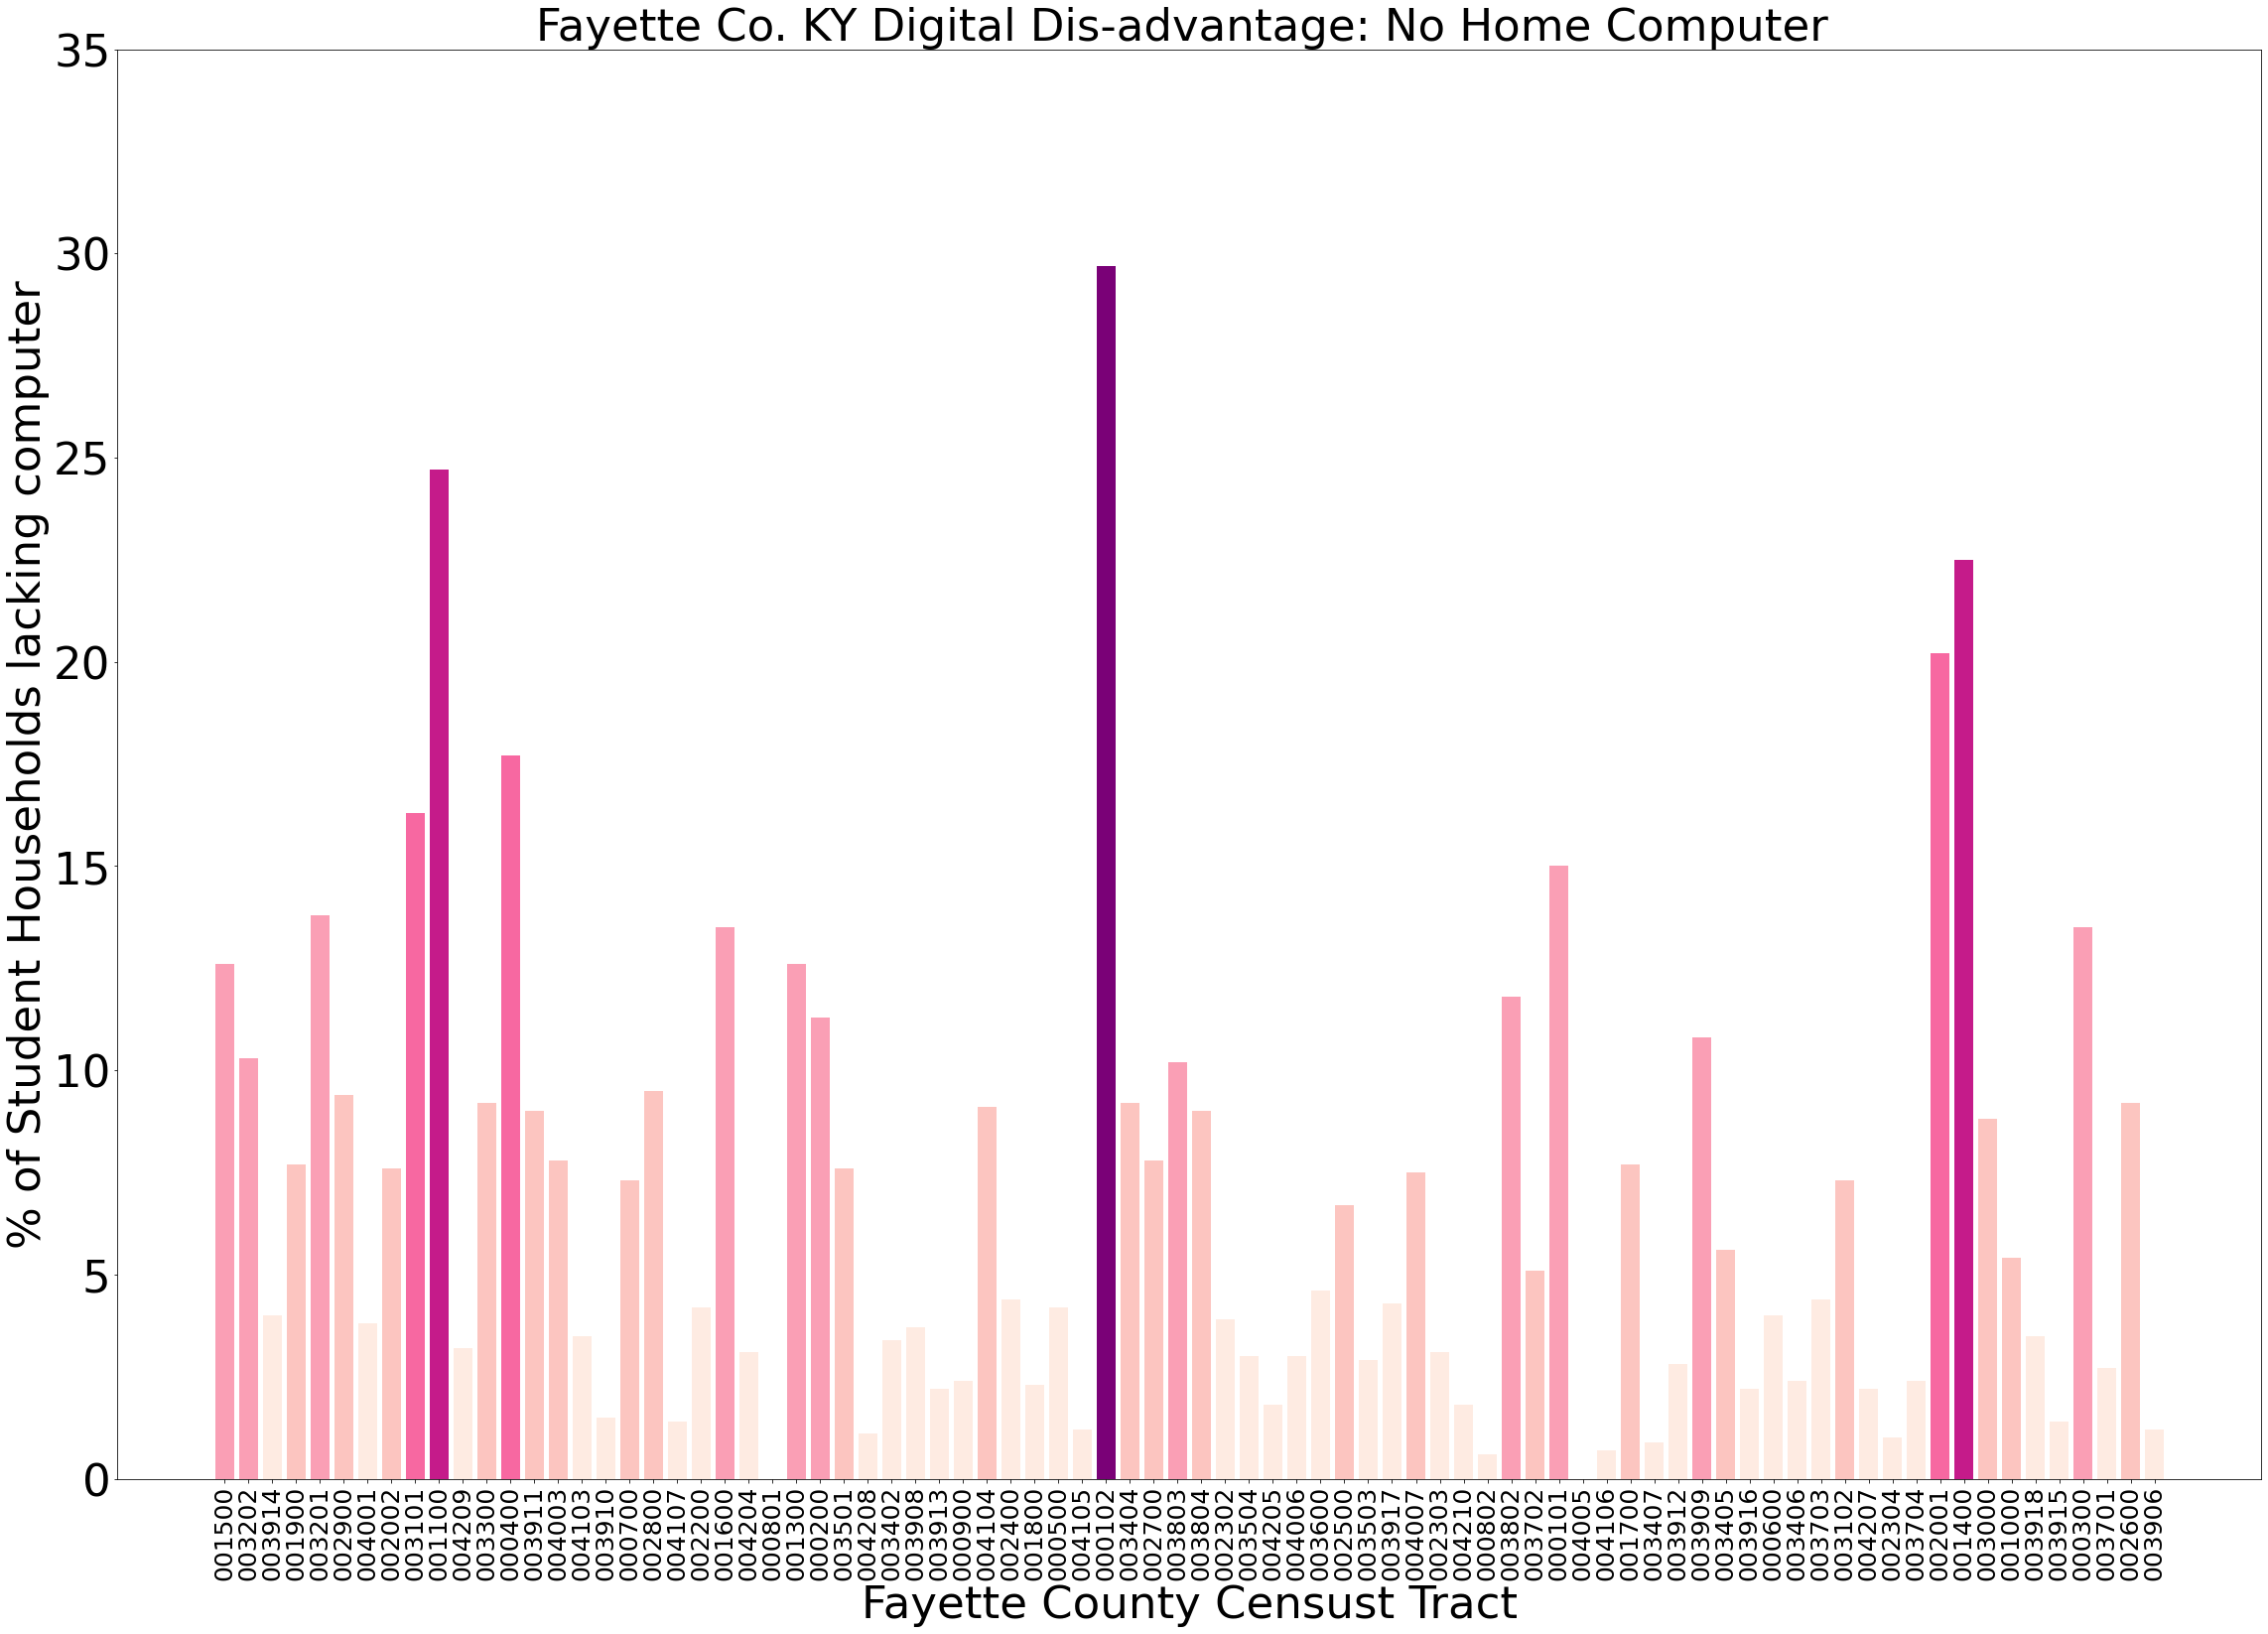

In [151]:
#define data (some for labeling; others to plot)
tract = fay_19_tract_dig_access_gdf['TRACTCE']
disadvantage_type = fay_19_tract_dig_access_gdf['noComp']

#stud_no_comp = cnty_access_percent_df3['S2801_C02_011E']

# define number of groupings/paired data using length of series for county names
x = np.arange(len(fay_19_tract_dig_access_gdf['TRACTCE']))

# color code y values
cc = ['colors']*len(disadvantage_type)
for n, val in enumerate(disadvantage_type):
    if val>=26:
        cc[n]='#7a0177'
    elif val>=21:
        cc[n]='#c51b8a'
    elif val >=16:
        cc[n]='#f768a1'
    elif val>=10:
        cc[n]='#fa9fb5'
    elif val>=5:
        cc[n]='#fcc5c0'
    else:
        cc[n]='#feebe2'
    
#define a figure to accept plots
#define ax as a way to add data in this instance bar for a data set
#The calling signature of add_axes is add_axes(rect), where rect is a list [x0, y0, width, height] 
#denoting the lower left point of the new axes in figure coodinates (x0,y0) 
#and its width and height. So the axes is positioned in absolute coordinates on the canvas.
fig = plt.figure()
ax = fig.add_axes([0,0,5,5])

#give data for each bar (1sr x based on index position in list, center bar 0, data set, color)
#ax.bar(x+0.00, disadvantage_type, color='b', width= 0.8)
ax.bar(x+0.00, disadvantage_type, color = cc, width= 0.8)

#add labels (axis, title, legend)
ax.set_ylabel('% of Student Households lacking computer', fontsize=45)
ax.set_xlabel('Fayette County Censust Tract', fontsize=45)
ax.set_title('Fayette Co. KY Digital Dis-advantage: No Home Computer ', fontsize=45)
ax.set_xticks(x)
ax.set_yticks(ax.get_yticks()[::1])
ax.tick_params(axis='both', which='major', labelsize=45)


# add visual mods
ax.set_xticklabels(tract, rotation=90, fontsize=25) #rotate xtick labels so not on top of eachother
#ax.legend(disadvantage_type, loc=2)

# view y limits
ax.get_ylim()



<a id ='writeIt'></a>
#### Write to File

In [1]:
# write gdfs to geoJSON
fay_19_tract_dig_access_gdf.to_file('./data/fay19tract_dig_access_json.json', driver='GeoJSON')


NameError: name 'fay_19_tract_dig_access_gdf' is not defined

<a id='toConsider'></a>
# Questions to consider More Directions
- What defines a household? How many students could be in a household? if 6% of Kenton county households didn't have a computer and that is: 3,921.72 households what does that really mean
- Add state boundary?
- Add back in the row 23 removed because all the others are populating?
- Add TOC to notebook
- Add Race as consideration from Redlining project (problem is need for whole county not just HOLC tracts that were clipped.
- Need to connect the dots of the story in the text boxes.
- Why are the layers not showing up in story map for no internet?